# EDA on Aspiring minds employability outcomes 2015 dataset.
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt


In [73]:
pwd

'/content'

In [74]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [75]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3   
1         assistant manager     Indore      m 1989-10-04          85.4   
2          systems engineer    Chennai      f 1992-08-03          85.0   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6   
4                       get    Manesar      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [76]:
#too visible all columns
pd.set_option('display.max_columns', None)

In [77]:
#dropping first column 'Unnamed: 0'
df.drop('Unnamed: 0', inplace=True, axis=1)

In [78]:
df.head()

ID   Salary        DOJ                  DOL               Designation  \
0  203097   420000 2012-06-01              present   senior quality engineer   
1  579905   500000 2013-09-01              present         assistant manager   
2  810601   325000 2014-06-01              present          systems engineer   
3  267447  1100000 2011-07-01              present  senior software engineer   
4  343523   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  12percentage                             12board  CollegeID  \
0          2007          95.8  board of intermediate education,ap       1141   
1          2007          85.0                                cbse       5807   
2          2010          68.2                                cbse         64   
3          2007          83.6                                cbse       6920   
4          2008          76.8                                cbse      11368   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  \
0       78.00           1141                0  Andhra Pradesh            2011   
1       70.06           5807                0  Madhya Pradesh            2012   
2       70.00             64                0   Uttar Pradesh            2014   
3       74.64           6920                1           Delhi            2011   
4       73.90          11368                0   Uttar Pradesh            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      515      585    525  0.635979                  445   
1      695      610    780  0.960603                   -1   
2      615      545    370  0.450877                  395   
3      635      585    625  0.974396                  615   
4      545      625    465  0.124502                   -1   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                     -1               -1              -1              -1   
1                    466               -1              -1              -1   
2                     -1               -1              -1              -1   
3                     -1               -1              -1              -1   
4                    233               -1              -1              -1   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0           -1         -1             0.9737         0.8128        0.5269   
1           -1         -1            -0.7335         0.3789        1.2396   
2           -1         -1             0.2718         1.7109        0.1637   
3           -1         -1             0.0464         0.3448       -0.3440   
4           -1         -1            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295

In [79]:
df = df.rename(columns = {"10percentage":"Class10_percentage"})
df = df.rename(columns = {"12percentage":"Class12_percentage"})
df = df.rename(columns = {"12graduation":"Class12_Passout"})

In [80]:
shape = df.shape
print(f'Dataset having {shape[0]} rows and {shape[1]} columns')
# print(f'Dataset having {shape[1]} columns')


Dataset having 3998 rows and 38 columns


In [81]:
np.round(df.describe().transpose())

count      mean       std      min       25%  \
ID                     3998.0  663795.0  363218.0  11244.0  334284.0   
Salary                 3998.0  307700.0  212737.0  35000.0  180000.0   
Class10_percentage     3998.0      78.0      10.0     43.0      72.0   
Class12_Passout        3998.0    2008.0       2.0   1995.0    2007.0   
Class12_percentage     3998.0      74.0      11.0     40.0      66.0   
CollegeID              3998.0    5157.0    4802.0      2.0     494.0   
CollegeTier            3998.0       2.0       0.0      1.0       2.0   
collegeGPA             3998.0      71.0       8.0      6.0      66.0   
CollegeCityID          3998.0    5157.0    4802.0      2.0     494.0   
CollegeCityTier        3998.0       0.0       0.0      0.0       0.0   
GraduationYear         3998.0    2012.0      32.0      0.0    2012.0   
English                3998.0     502.0     105.0    180.0     425.0   
Logical                3998.0     502.0      87.0    195.0     445.0   
Quant                  3998.0     513.0     122.0    120.0     430.0   
Domain                 3998.0       1.0       0.0     -1.0       0.0   
ComputerProgramming    3998.0     353.0     205.0     -1.0     295.0   
ElectronicsAndSemicon  3998.0      95.0     158.0     -1.0      -1.0   
ComputerScience        3998.0      91.0     175.0     -1.0      -1.0   
MechanicalEngg         3998.0      23.0      98.0     -1.0      -1.0   
ElectricalEngg         3998.0      16.0      88.0     -1.0      -1.0   
TelecomEngg            3998.0      32.0     105.0     -1.0      -1.0   
CivilEngg              3998.0       3.0      37.0     -1.0      -1.0   
conscientiousness      3998.0      -0.0       1.0     -4.0      -1.0   
agreeableness          3998.0       0.0       1.0     -6.0      -0.0   
extraversion           3998.0       0.0       1.0     -5.0      -1.0   
nueroticism            3998.0      -0.0       1.0     -3.0      -1.0   
openess_to_experience  3998.0      -0.0       1.0     -7.0      -1.0   

                            50%       75%        max  
ID                     639600.0  990480.0  1298275.0  
Salary                 300000.0  370000.0  4000000.0  
Class10_percentage         79.0      86.0       98.0  
Class12_Passout          2008.0    2009.0     2013.0  
Class12_percentage         74.0      83.0       99.0  
CollegeID                3879.0    8818.0    18409.0  
CollegeTier                 2.0       2.0        2.0  
collegeGPA                 72.0      76.0      100.0  
CollegeCityID            3879.0    8818.0    18409.0  
CollegeCityTier             0.0       1.0        1.0  
GraduationYear           2013.0    2014.0     2017.0  
English                   500.0     570.0      875.0  
Logical                   505.0     565.0      795.0  
Quant                     515.0     595.0      900.0  
Domain                      1.0       1.0        1.0  
ComputerProgramming       415.0     495.0      840.0  
ElectronicsAndSemicon      -1.0     233.0      612.0  
ComputerScience            -1.0      -1.0      715.0  
MechanicalEngg             -1.0      -1.0      623.0  
ElectricalEngg             -1.0      -1.0      676.0  
TelecomEngg                -1.0      -1.0      548.0  
CivilEngg                  -1.0      -1.0      516.0  
conscientiousness           0.0       1.0        2.0  
agreeableness               0.0       1.0        2.0  
extraversion                0.0       1.0        3.0  
nueroticism                -0.0       1.0        3.0  
openess_to_experience      -0.0       1.0        2.0

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   Class10_percentage     3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  Class12_Passout        3998 non-null   int64         
 11  Class12_percentage     3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

## Preparing Data

In [83]:
df.head()

ID   Salary        DOJ                  DOL               Designation  \
0  203097   420000 2012-06-01              present   senior quality engineer   
1  579905   500000 2013-09-01              present         assistant manager   
2  810601   325000 2014-06-01              present          systems engineer   
3  267447  1100000 2011-07-01              present  senior software engineer   
4  343523   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  Class10_percentage  \
0  Bangalore      f 1990-02-19                84.3   
1     Indore      m 1989-10-04                85.4   
2    Chennai      f 1992-08-03                85.0   
3    Gurgaon      m 1989-12-05                85.6   
4    Manesar      m 1991-02-27                78.0   

                          10board  Class12_Passout  Class12_percentage  \
0  board ofsecondary education,ap             2007                95.8   
1                            cbse             2007                85.0   
2                            cbse             2010                68.2   
3                            cbse             2007                83.6   
4                            cbse             2008                76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [84]:
int_col = df.select_dtypes(include=['int64','float64']).columns
cat_col = df.select_dtypes(include=['object']).columns
datet_col = df.select_dtypes(include=['datetime64[ns]']).columns
print('Int and float col name :')
print(int_col)
print()
print('Categorical col name :')
print(cat_col)
print()
print('Date Time col name :')
print(datet_col)


Int and float col name :
Index(['ID', 'Salary', 'Class10_percentage', 'Class12_Passout',
       'Class12_percentage', 'CollegeID', 'CollegeTier', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

Categorical col name :
Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

Date Time col name :
Index(['DOJ', 'DOB'], dtype='object')


In [85]:
#converting date column to datetime type
#and fetching year,month and day from column
# df["DOJ"]=pd.to_datetime(df["DOJ"])
df["DOL"].replace("present",dt.datetime.today(),inplace=True)
df["DOL"]=pd.to_datetime(df["DOL"])
df["Year"]=pd.to_datetime(df["DOL"]).dt.year
df["Month"]=pd.to_datetime(df["DOL"]).dt.month
df["Day"]=pd.to_datetime(df["DOL"]).dt.day

In [86]:
# replacing -1 value present in dataframe to 0

df.replace(to_replace=-1, value=0, inplace=True)

> # 10 board column cleaning

In [87]:
# we can see in 10board and 12board columns values is not stable, so i'am changing all values to only state board,cbse board,icse board
df['10board'].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [88]:
df['10board'].unique()


array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [89]:
# df.replace(to_replace=-1, value=0, inplace=True)
df['10board'].replace([ 'cbse', 'cbse[gulf zone]','icse board , new delhi', 'cbse board','central board of secondary education'], 'cbse',inplace=True)
df['10board'].replace("cicse","icse",inplace=True)


In [90]:
board10_uniqueval = df['10board'].unique()
board10_append = []
for i in board10_uniqueval:
  if i == 'cbse' or i == 'icse':
    continue
  else:
    board10_append.append(i)

board10_append

['board ofsecondary education,ap',
 'state board',
 'mp board bhopal',
 'karnataka secondary school of examination',
 'up',
 'karnataka state education examination board',
 'ssc',
 'kerala state technical education',
 0,
 'bseb',
 'state board of secondary education, andhra pradesh',
 'matriculation',
 'gujarat state board',
 'karnataka state board',
 'wbbse',
 'maharashtra state board',
 'icse board',
 'up board',
 'board of secondary education(bse) orissa',
 'little jacky matric higher secondary school',
 'uttar pradesh board',
 'bsc,orissa',
 'mp board',
 'upboard',
 'matriculation board',
 'j & k bord',
 'rbse',
 'pseb',
 'jkbose',
 'haryana board of school education,(hbse)',
 'metric',
 'ms board',
 'kseeb',
 'stateboard',
 'maticulation',
 'karnataka secondory education board',
 'mumbai board',
 'sslc',
 'kseb',
 'board secondary  education',
 'matric board',
 'board of secondary education',
 'west bengal board of secondary education',
 'jharkhand secondary examination board,ranc

In [91]:
for j in board10_append:
  df['10board'].replace(j, 'state',inplace=True)

In [92]:
df['10board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

> # 12 board column cleaning

In [93]:
df['12board'].value_counts()

cbse                                1400
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [94]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [95]:
df['12board'].replace(['all india board','central board of secondary education, new delhi', 'cbese'], 'cbse',inplace=True)
df['12board'].replace(['isc', 'isc board', 'isce', 'cicse','isc board , new delhi'], 'icse',inplace=True)

In [96]:
board12_uniqueval = df['12board'].unique()
board12_append = []
for i in board12_uniqueval:
  if i == 'cbse' or i == 'icse':
    continue
  else:
    board12_append.append(i)

board12_append

['board of intermediate education,ap',
 'state board',
 'mp board',
 'karnataka pre university board',
 'up',
 'p u board, karnataka',
 'dept of pre-university education',
 'bie',
 'kerala state hse board',
 'up board',
 0,
 'bseb',
 'chse',
 'puc',
 ' upboard',
 'state  board of intermediate education, andhra pradesh',
 'karnataka state board',
 'west bengal state council of technical education',
 'wbchse',
 'maharashtra state board',
 'ssc',
 'sda matric higher secondary school',
 'uttar pradesh board',
 'ibe',
 'chsc',
 'board of intermediate',
 'upboard',
 'sbtet',
 'hisher seconadry examination(state board)',
 'pre university',
 'borad of intermediate',
 'j & k board',
 'intermediate board of andhra pardesh',
 'rbse',
 'central board of secondary education',
 'jkbose',
 'hbse',
 'board of intermediate education',
 'state',
 'ms board',
 'pue',
 'intermediate state board',
 'stateboard',
 'hsc',
 'electonincs and communication(dote)',
 'karnataka pu board',
 'government polytechnic

In [97]:
for j in board12_append:
  df['12board'].replace(j,'state',inplace=True)
# data['10 board'].replace(0,'n/a',inplace=True)

df['12board'].unique()

array(['state', 'cbse', 'icse'], dtype=object)

In [98]:
df.shape

(3998, 41)

In [99]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
Class10_percentage       0
10board                  0
Class12_Passout          0
Class12_percentage       0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [100]:
df[int_col].head()

ID   Salary  Class10_percentage  Class12_Passout  Class12_percentage  \
0  203097   420000                84.3             2007                95.8   
1  579905   500000                85.4             2007                85.0   
2  810601   325000                85.0             2010                68.2   
3  267447  1100000                85.6             2007                83.6   
4  343523   200000                78.0             2008                76.8   

   CollegeID  CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  \
0       1141            2       78.00           1141                0   
1       5807            2       70.06           5807                0   
2         64            2       70.00             64                0   
3       6920            1       74.64           6920                1   
4      11368            2       73.90          11368                0   

   GraduationYear  English  Logical  Quant    Domain  ComputerProgramming  \
0            2011      515      585    525  0.635979                  445   
1            2012      695      610    780  0.960603                    0   
2            2014      615      545    370  0.450877                  395   
3            2011      635      585    625  0.974396                  615   
4            2012      545      625    465  0.124502                    0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                      0                0               0               0   
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0            0          0             0.9737         0.8128        0.5269   
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295

In [101]:
 df[cat_col].head()

DOL               Designation    JobCity Gender  \
0 2022-08-22 07:07:37.932173   senior quality engineer  Bangalore      f   
1 2022-08-22 07:07:37.932173         assistant manager     Indore      m   
2 2022-08-22 07:07:37.932173          systems engineer    Chennai      f   
3 2022-08-22 07:07:37.932173  senior software engineer    Gurgaon      m   
4 2015-03-01 00:00:00.000000                       get    Manesar      m   

  10board 12board       Degree                             Specialization  \
0   state   state  B.Tech/B.E.                       computer engineering   
1    cbse    cbse  B.Tech/B.E.  electronics and communication engineering   
2    cbse    cbse  B.Tech/B.E.                     information technology   
3    cbse    cbse  B.Tech/B.E.                       computer engineering   
4    cbse    cbse  B.Tech/B.E.  electronics and communication engineering   

     CollegeState  
0  Andhra Pradesh  
1  Madhya Pradesh  
2   Uttar Pradesh  
3           Delhi  
4   Uttar Pradesh

In [102]:
df[datet_col].head()

DOJ        DOB
0 2012-06-01 1990-02-19
1 2013-09-01 1989-10-04
2 2014-06-01 1992-08-03
3 2011-07-01 1989-12-05
4 2014-03-01 1991-02-27

> # Univariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:6.45
Kurtosis:80.93


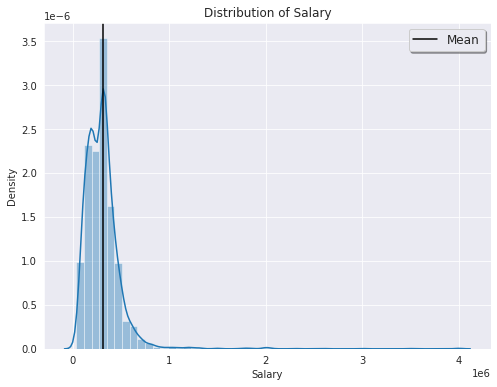

In [103]:
# Univariate Analysis on Salary column

sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='black', label='Mean')
plt.title("Distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

skew = df['Salary'].skew()
kurt = df['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

plt.show()

<pre>From above dsitribution, we see the distribution is right skewed and its Log Normal Distribution</pre>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:-0.59
Kurtosis:-0.11


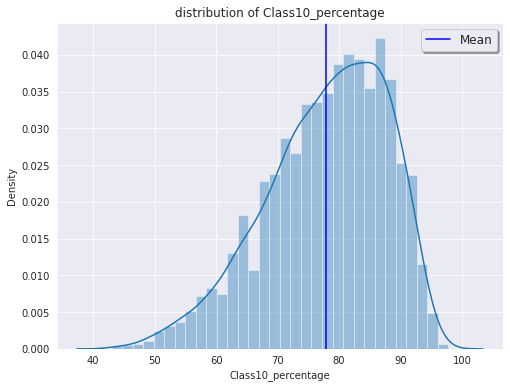

In [104]:
# Univariate Analysis on Sa10percentage column

sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['Class10_percentage'])
plt.axvline(df['Class10_percentage'].mean(), color="blue", label="Mean")
plt.title("distribution of Class10_percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['Class10_percentage'].skew()
kurt = df['Class10_percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

<pre>Negative skewed Distribution</pre>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:-0.03
Kurtosis:-0.63


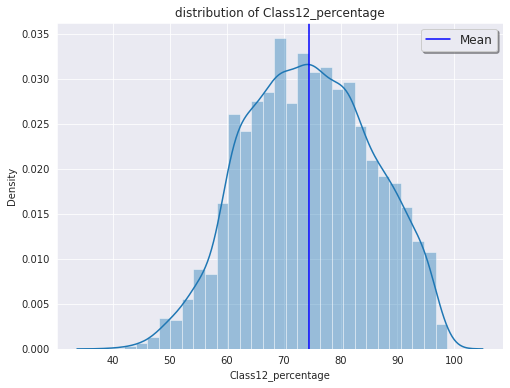

In [105]:
# Univariate Analysis on Sa10percentage column

sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['Class12_percentage'])
plt.axvline(df['Class12_percentage'].mean(), color="blue", label="Mean")
plt.title("distribution of Class12_percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['Class12_percentage'].skew()
kurt = df['Class12_percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

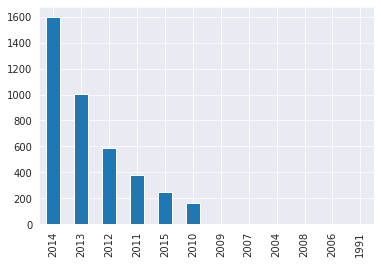

In [106]:
#year of joining
(df['DOJ'].dt.year).value_counts().plot(kind='bar')

<pre>As per data, 2014 have more joining then any other years</pre>

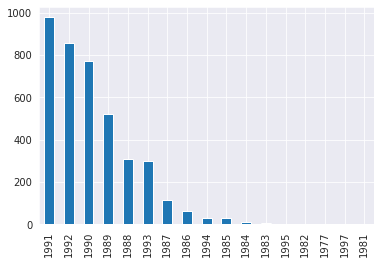

In [107]:
# Bar graph of Birth Year
(df['DOB'].dt.year).value_counts().plot(kind='bar')

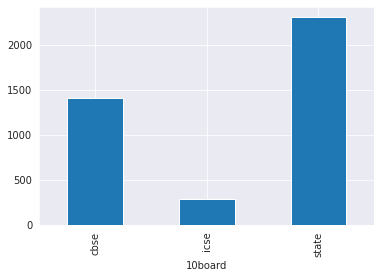

In [108]:
board10_grouped = df.groupby(by='10board').size()
board10_grouped.plot.bar()

<pre>More Aspirant had there 10 board from state board.</pre>

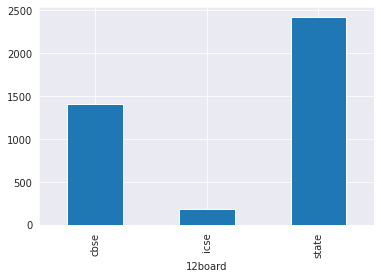

In [109]:
board12_grouped = df.groupby(by='12board').size()
board12_grouped.plot.bar()

<pre>More Aspirant had there 12 board from state board.</pre>

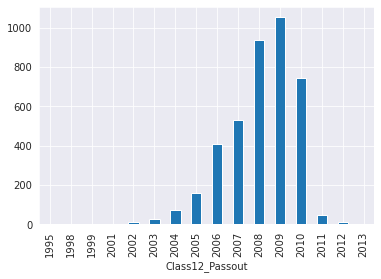

In [110]:
class12passout_grouped = df.groupby(by='Class12_Passout').size()
class12passout_grouped.plot.bar()

<pre>Most aspirants cleard 12 board exam in 2009</pre>

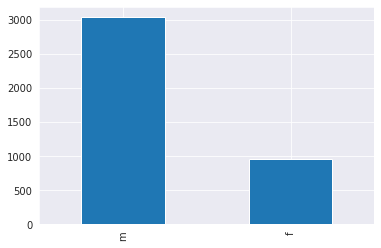

In [111]:
(df['Gender']).value_counts().plot(kind='bar')

<pre>More Male employees in Industries</pre>

In [112]:
top_fields=list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
print(top_fields)

top_designation=df[df["Designation"].isin(top_fields)]


['senior software engineer', 'automation engineer', 'assistant system engineer', 'programmer', 'application developer', 'software test engineer', 'software developer', 'software engineer trainee', 'operations analyst', 'technical lead', 'data scientist', 'it technician', 'field engineer', 'client services associate', 'salesforce developer', 'java software engineer', 'software engineer', 'sales account manager', 'junior manager', 'senior engineer']


In [113]:
top_designation.groupby(["Designation"])["Salary"].describe().sort_values("max",ascending=False)

count          mean           std        min  \
Designation                                                               
automation engineer         15.0  6.406667e+05  9.481069e+05   110000.0   
senior software engineer    72.0  5.440278e+05  4.521737e+05   215000.0   
assistant system engineer   23.0  4.823913e+05  6.583500e+05   290000.0   
programmer                  36.0  3.259722e+05  4.783511e+05    60000.0   
application developer       52.0  4.190385e+05  3.878713e+05    40000.0   
software test engineer     100.0  3.374500e+05  3.051780e+05    60000.0   
software developer         265.0  2.583774e+05  1.784195e+05    50000.0   
software engineer trainee    3.0  7.816667e+05  1.099231e+06   105000.0   
operations analyst          12.0  4.437500e+05  5.075302e+05   145000.0   
it technician                6.0  5.183333e+05  7.270878e+05   180000.0   
data scientist               3.0  8.966667e+05  9.612665e+05   240000.0   
technical lead               5.0  6.690000e+05  7.642104e+05   120000.0   
field engineer               3.0  8.016667e+05  9.165742e+05   265000.0   
salesforce developer         7.0  4.607143e+05  5.981808e+05    95000.0   
client services associate   13.0  3.523077e+05  4.491966e+05   120000.0   
java software engineer     111.0  3.013063e+05  1.751372e+05   105000.0   
software engineer          539.0  3.412152e+05  1.445396e+05    60000.0   
sales account manager        2.0  7.100000e+05  8.626703e+05   100000.0   
junior manager               1.0  1.300000e+06           NaN  1300000.0   
senior engineer             18.0  5.250000e+05  2.462244e+05   250000.0   

                                 25%        50%        75%        max  
Designation                                                            
automation engineer         307500.0   400000.0   512500.0  4000000.0  
senior software engineer    348750.0   455000.0   608750.0  4000000.0  
assistant system engineer   325000.0   350000.0   372500.0  3500000.0  
programmer                  148750.0   210000.0   312500.0  3000000.0  
application developer       300000.0   350000.0   411250.0  2600000.0  
software test engineer      218750.0   300000.0   360000.0  2500000.0  
software developer          145000.0   240000.0   340000.0  2300000.0  
software engineer trainee   147500.0   190000.0  1120000.0  2050000.0  
operations analyst          247500.0   290000.0   415000.0  2020000.0  
it technician               200000.0   215000.0   282500.0  2000000.0  
data scientist              345000.0   450000.0  1225000.0  2000000.0  
technical lead              215000.0   465000.0   545000.0  2000000.0  
field engineer              272500.0   280000.0  1070000.0  1860000.0  
salesforce developer        180000.0   280000.0   345000.0  1800000.0  
client services associate   180000.0   205000.0   275000.0  1800000.0  
java software engineer      202500.0   300000.0   350000.0  1745000.0  
software engineer           255000.0   320000.0   400000.0  1500000.0  
sales account manager       405000.0   710000.0  1015000.0  1320000.0  
junior manager             1300000.0  1300000.0  1300000.0  1300000.0  
senior engineer             370000.0   485000.0   583750.0  1300000.0

<pre>Automation Engineer have more salary than any other field</pre>

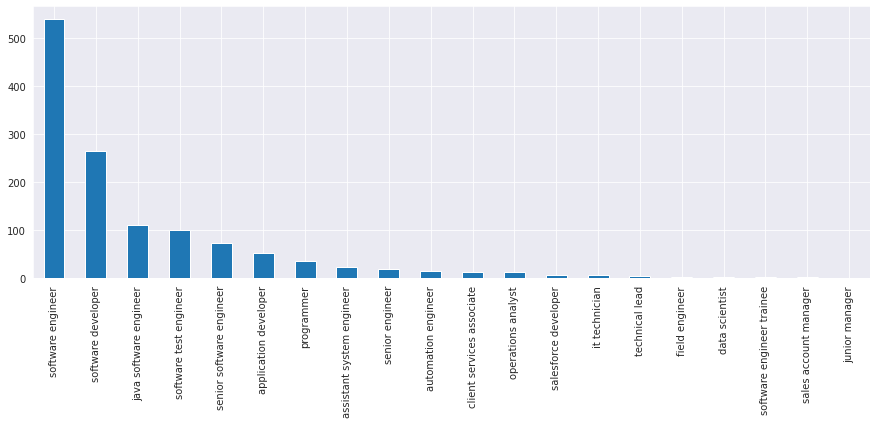

In [114]:
plt.figure(figsize=(15,5))
top_designation["Designation"].value_counts().plot(kind="bar")

<pre>`In AMEO dataset, highest no of employee work as software engineer`</pre>

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

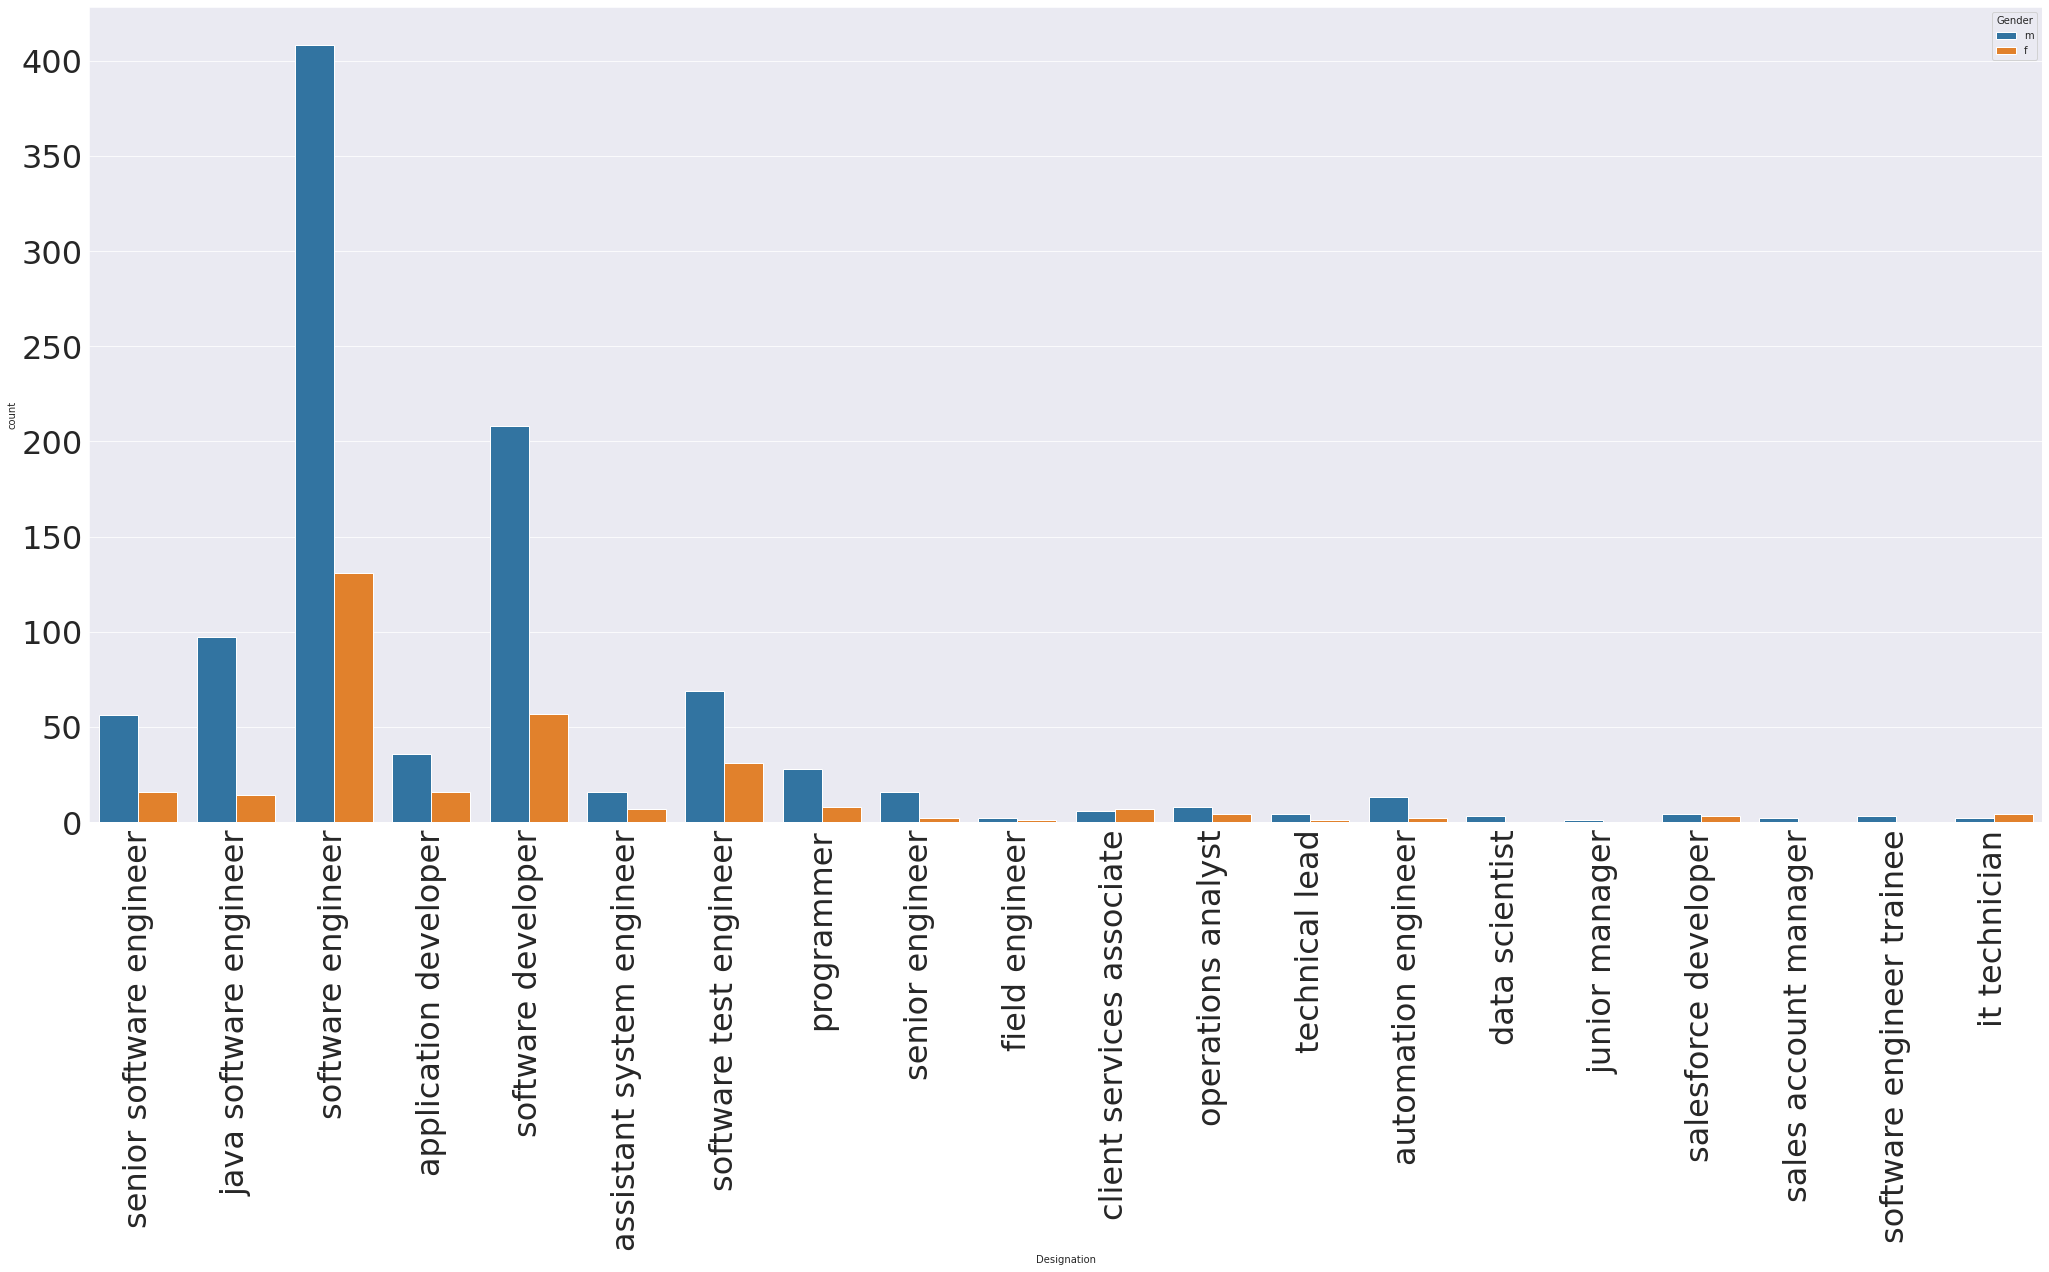

In [115]:
plt.figure(figsize=(35,15))
sns.countplot(x="Designation",hue="Gender",data=top_designation)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

<pre>Software engineer have high aspirants in both male and female comparing to other designation</pre>

In [116]:
#lets add exp column to dataset
top_designation["Exp"]=(top_designation["DOL"]).dt.year - (top_designation["DOJ"]).dt.year


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
top_designation.head()

ID   Salary        DOJ                        DOL  \
3    267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   
6    947847   300000 2014-08-01 2015-05-01 00:00:00.000000   
14  1279958   300000 2013-07-01 2022-08-22 07:07:37.932173   
19   466888   325000 2014-09-01 2022-08-22 07:07:37.932173   
20   140069   320000 2010-11-01 2012-09-01 00:00:00.000000   

                 Designation    JobCity Gender        DOB  Class10_percentage  \
3   senior software engineer    Gurgaon      m 1989-12-05               85.60   
6     java software engineer   Banglore      m 1993-02-01               86.08   
14    java software engineer  Bangalore      m 1992-07-02               81.20   
19         software engineer       Pune      f 1990-11-30               79.00   
20         software engineer  Bangalore      f 1988-07-25               91.20   

   10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
3     cbse             2007               83.60    cbse       6920   
6    state             2010               67.50   state        314   
14   state             2008               79.90   state         64   
19    cbse             2008               62.20    cbse       7977   
20   state             2006               84.63   state       4437   

    CollegeTier       Degree                           Specialization  \
3             1  B.Tech/B.E.                     computer engineering   
6             2  B.Tech/B.E.           computer science & engineering   
14            2  B.Tech/B.E.  instrumentation and control engineering   
19            2  B.Tech/B.E.                     computer engineering   
20            2  B.Tech/B.E.                     computer engineering   

    collegeGPA  CollegeCityID  CollegeCityTier   CollegeState  GraduationYear  \
3        74.64           6920                1          Delhi            2011   
6        72.98            314                1      Karnataka            2014   
14       67.67             64                0  Uttar Pradesh            2013   
19       76.30           7977                0  Uttar Pradesh            2012   
20       78.15           4437                0      Karnataka            2010   

    English  Logical  Quant    Domain  ComputerProgramming  \
3       635      585    625  0.974396                  615   
6       590      435    380  0.356536                  405   
14      395      565    645  0.000000                  495   
19      485      445    435  0.864685                  525   
20      455      535    445  0.635979                  445   

    ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
3                       0                0               0               0   
6                       0              346               0               0   
14                      0              376               0               0   
19                      0                0               0               0   
20                      0                0               0               0   

    TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
3             0          0             0.0464         0.3448       -0.3440   
6             0          0             1.7081        -0.1054       -1.0379   
14            0          0             0.7027         0.7119        0.0100   
19            0          0             0.8192         0.2668       -0.2714   
20            0          0            -0.1082         0.9688        0.5269   

    nueroticism  openess_to_experience  Year  Month  Day  Exp  
3       -0.4078                -0.9194  2022      8   22   11  
6       -2.0092                -1.0872  2015      5    1    1  
14      -0.9950                 0.6721  2022      8   22    9  
19      -0.4078                -0.1295  2022      8   22    8  
20      -0.2902                 0.3444  2012      9    1    2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


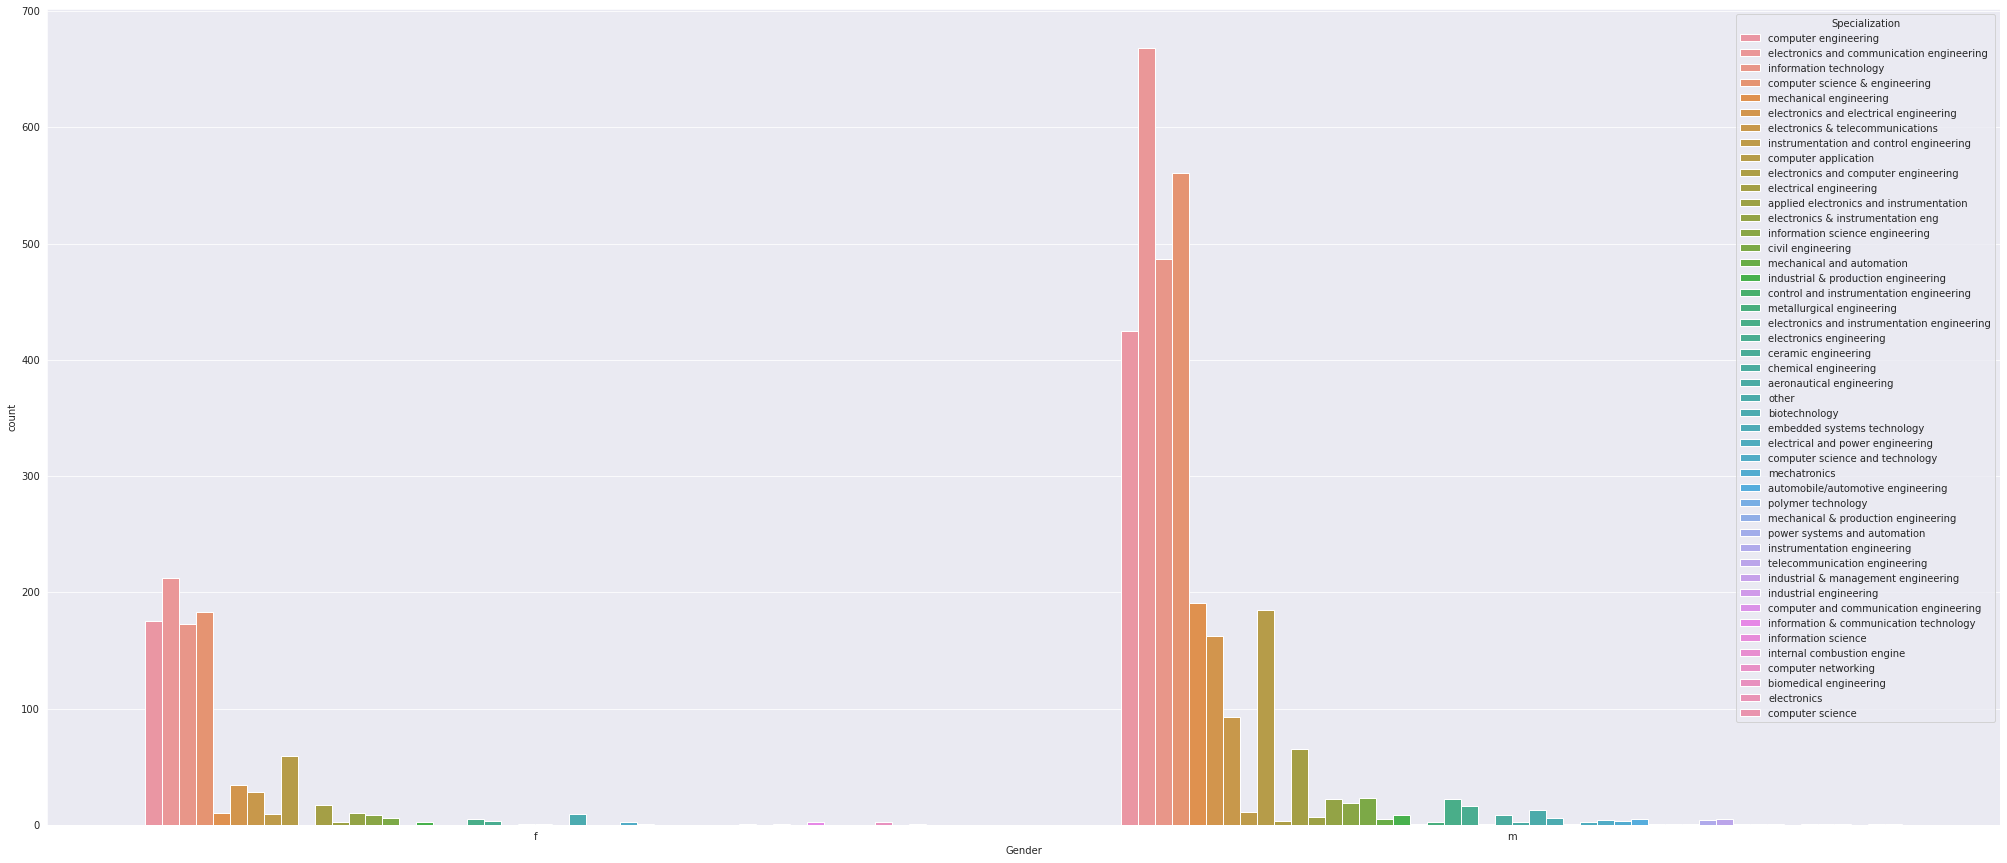

In [118]:
plt.figure(figsize=(35,15))

sns.countplot(df.Gender,hue=df.Specialization)
plt.show()

<pre>In all sector, Male aspirants are more comparing to female aspirants</pre>

> # Finding Outliers 

In [119]:
def outliers_iqr(df,col):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in df[col]:
        if val < lb or val > ub:
            outliers.append(val)

    return outliers,len(outliers)

In [120]:
outliers_iqr(df, 'Salary')

([1100000,
  800000,
  1500000,
  1200000,
  675000,
  1860000,
  660000,
  700000,
  785000,
  700000,
  690000,
  700000,
  1110000,
  1200000,
  1000000,
  715000,
  820000,
  720000,
  2600000,
  715000,
  800000,
  1025000,
  775000,
  1300000,
  3500000,
  910000,
  730000,
  680000,
  1300000,
  1050000,
  2000000,
  700000,
  860000,
  800000,
  800000,
  690000,
  4000000,
  2020000,
  700000,
  700000,
  760000,
  800000,
  870000,
  2050000,
  700000,
  1320000,
  755000,
  880000,
  3000000,
  700000,
  720000,
  820000,
  2500000,
  2300000,
  950000,
  1300000,
  1200000,
  4000000,
  700000,
  700000,
  1800000,
  725000,
  1200000,
  720000,
  700000,
  930000,
  680000,
  1000000,
  750000,
  1000000,
  705000,
  1745000,
  2000000,
  1800000,
  850000,
  845000,
  700000,
  660000,
  820000,
  750000,
  1200000,
  670000,
  1030000,
  770000,
  800000,
  720000,
  900000,
  1210000,
  1500000,
  1100000,
  680000,
  675000,
  700000,
  800000,
  700000,
  2000000,
  2

Text(0.5, 0.98, 'Salary levels by gender')

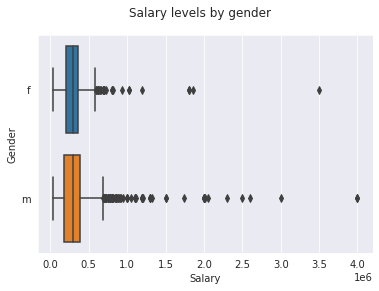

In [121]:

sns.boxplot(x='Salary', y = 'Gender', data=df)
plt.suptitle('Salary levels by gender')

<pre>In salary column male having more outliers</pre>

In [122]:
df.head()

ID   Salary        DOJ                        DOL  \
0  203097   420000 2012-06-01 2022-08-22 07:07:37.932173   
1  579905   500000 2013-09-01 2022-08-22 07:07:37.932173   
2  810601   325000 2014-06-01 2022-08-22 07:07:37.932173   
3  267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   
4  343523   200000 2014-03-01 2015-03-01 00:00:00.000000   

                Designation    JobCity Gender        DOB  Class10_percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19                84.3   
1         assistant manager     Indore      m 1989-10-04                85.4   
2          systems engineer    Chennai      f 1992-08-03                85.0   
3  senior software engineer    Gurgaon      m 1989-12-05                85.6   
4                       get    Manesar      m 1991-02-27                78.0   

  10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
0   state             2007                95.8   state       1141   
1    cbse             2007                85.0    cbse       5807   
2    cbse             2010                68.2    cbse         64   
3    cbse             2007                83.6    cbse       6920   
4    cbse             2008                76.8    cbse      11368   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  \
0       78.00           1141                0  Andhra Pradesh            2011   
1       70.06           5807                0  Madhya Pradesh            2012   
2       70.00             64                0   Uttar Pradesh            2014   
3       74.64           6920                1           Delhi            2011   
4       73.90          11368                0   Uttar Pradesh            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      515      585    525  0.635979                  445   
1      695      610    780  0.960603                    0   
2      615      545    370  0.450877                  395   
3      635      585    625  0.974396                  615   
4      545      625    465  0.124502                    0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                      0                0               0               0   
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0            0          0             0.9737         0.8128        0.5269   
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  Year  Month  Day  
0      1.35490                -0.4455  2022      8   22  
1     -0.10760                 0.8637  2022      8   22  
2     -0.86820                 0.6721  2022      8   22  
3     -0.40780                -0.9194  2022      8   22  
4      0.09163                -0.1295  2015      3    1

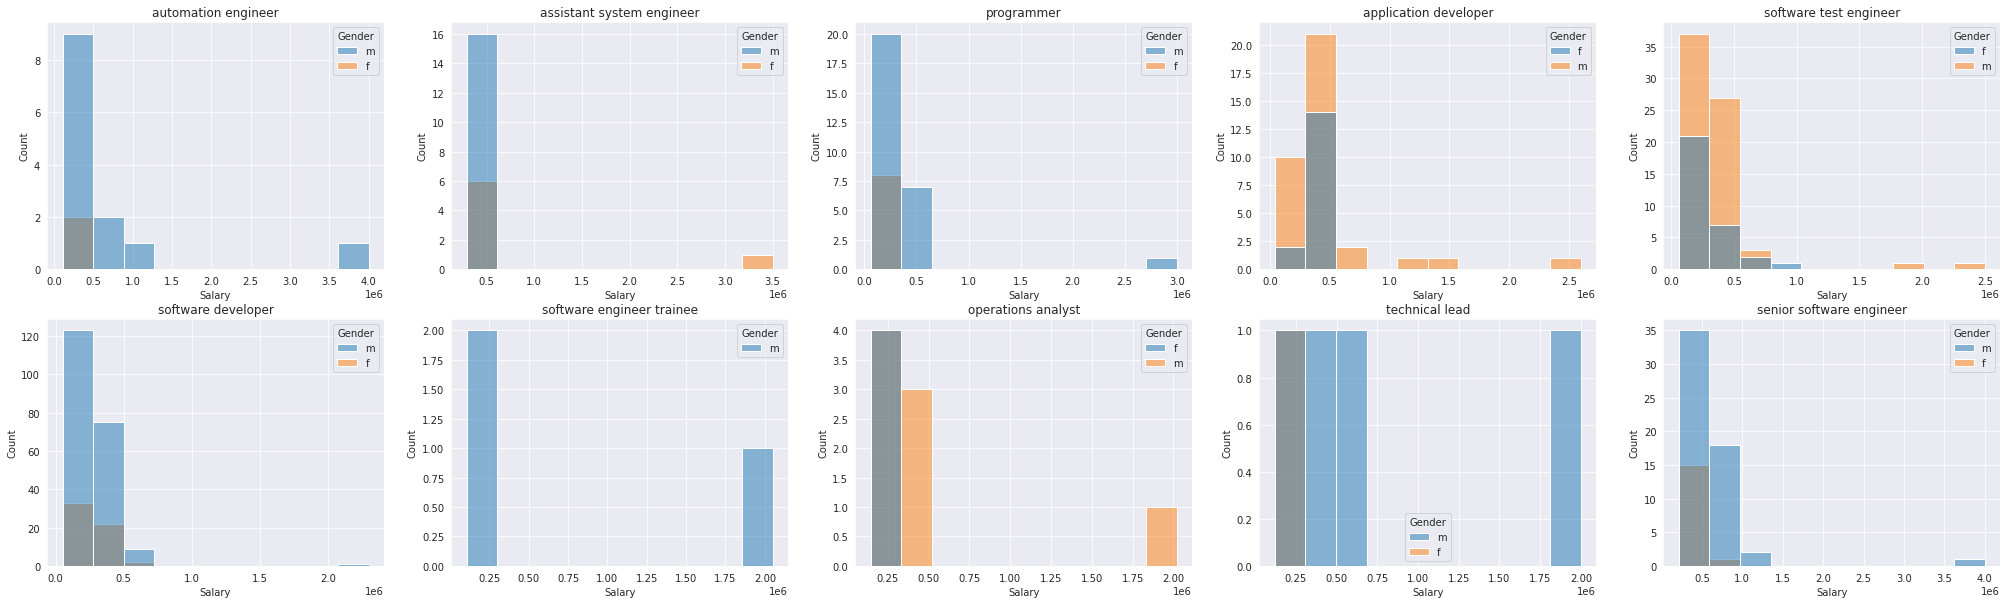

In [123]:
#Salary distribution for each designation
plt.figure(figsize=(35,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Salary",data=top_designation[top_designation["Designation"]==top_fields[j]],bins=10,hue="Gender")
    plt.title(top_fields[j])

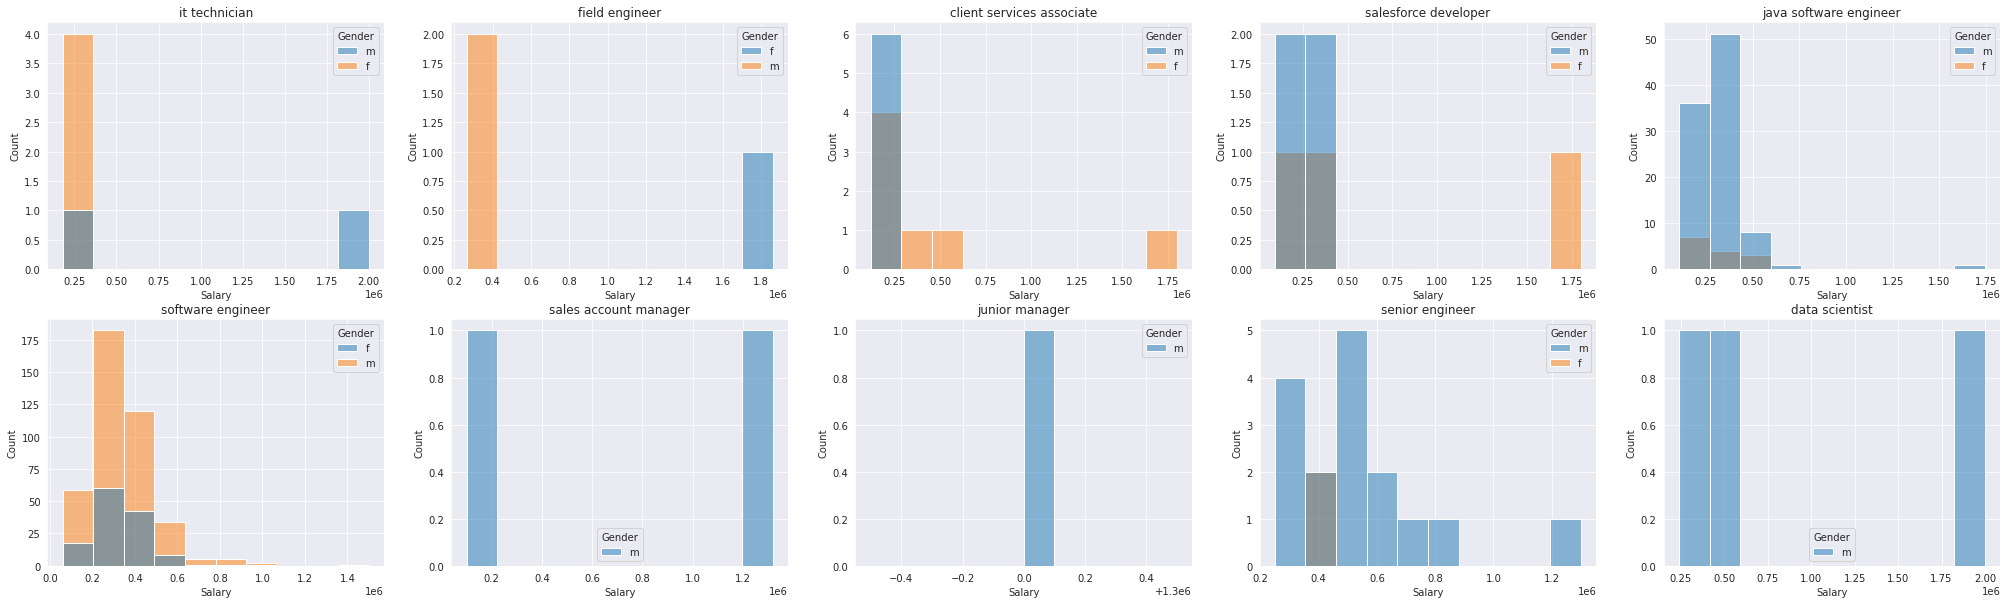

In [124]:
i=10
plt.figure(figsize=(35,10))
for j in range(len(top_fields[10:])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Salary",data=top_designation[top_designation["Designation"]==top_fields[i]],bins=10,hue="Gender")
    plt.title(top_fields[i])
    i=i+1

<pre>It Looks Like All fields have starting salary in range of 250 to 500K for Most counts of Males and less count of Females.</pre>

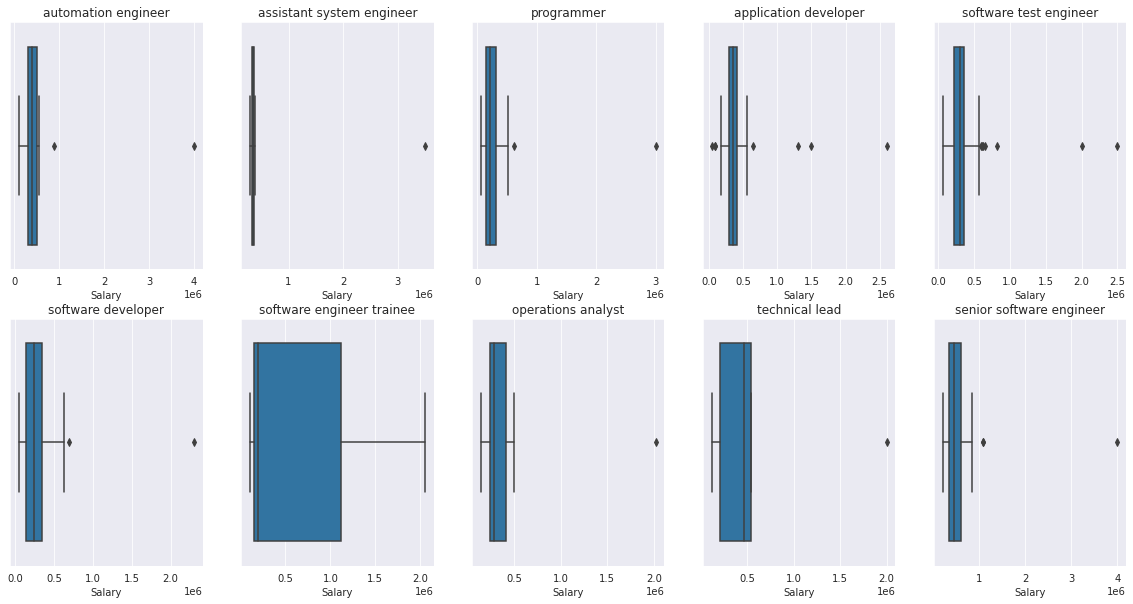

In [125]:
# Doing same with Box plot and see the median salary
plt.figure(figsize=(20,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=top_designation[top_designation["Designation"]==top_fields[j]])
    plt.title(top_fields[j])

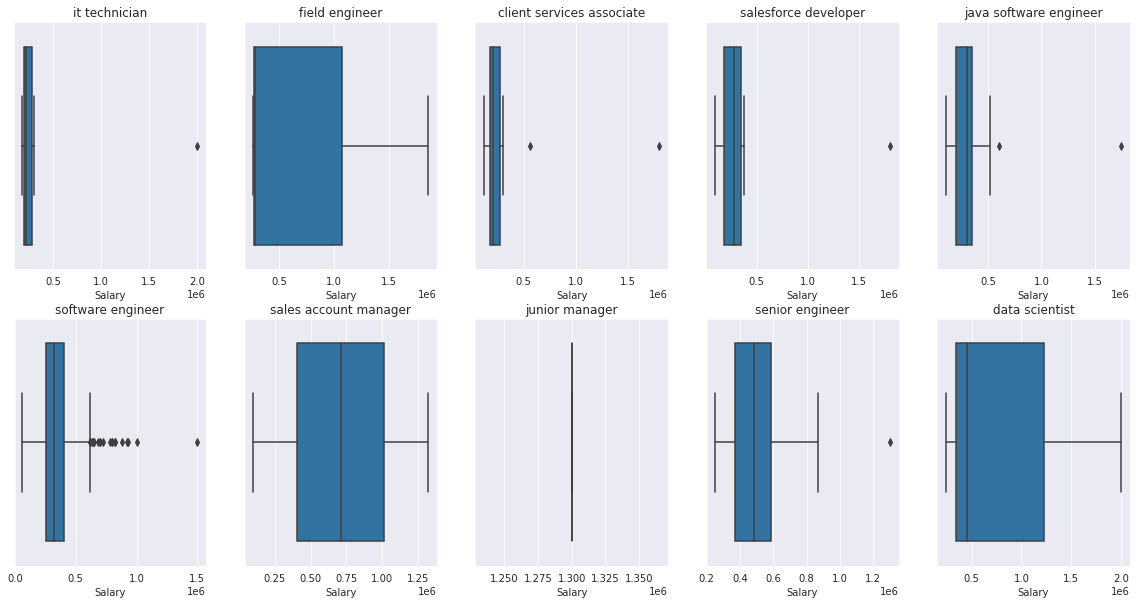

In [126]:
i=10
plt.figure(figsize=(20,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=top_designation[top_designation["Designation"]==top_fields[i]])
    plt.title(top_fields[i])
    i=i+1

<pre>the box plot we see get better idea and also see the outliers which confirm that there are individuals who have salary greater than 1000K. and this outliers are acceptable</pre>

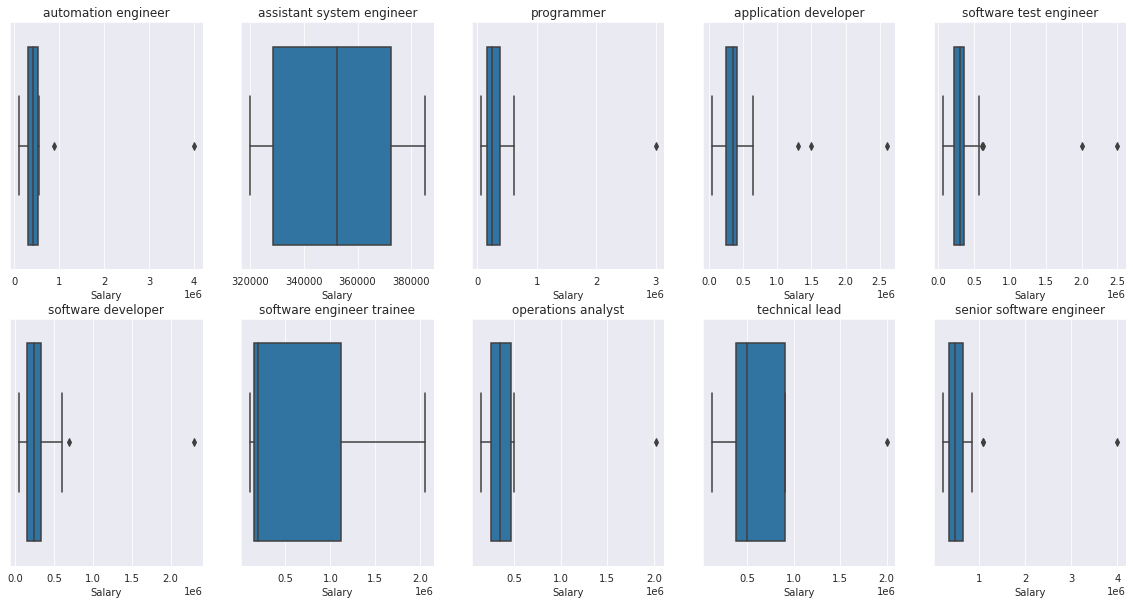

In [127]:
# lets check for individual gender
# for male

plt.figure(figsize=(20,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=top_designation[(top_designation["Designation"]==top_fields[j]) & (top_designation["Gender"]=="m")])
    plt.title(top_fields[j])

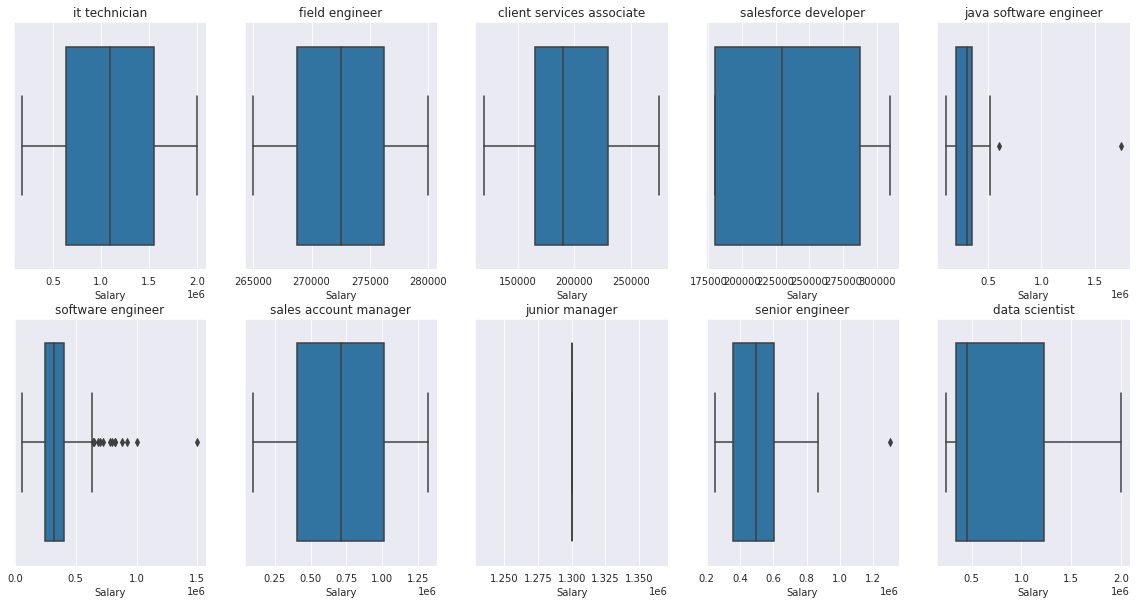

In [128]:
i=10
plt.figure(figsize=(20,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=top_designation[(top_designation["Designation"]==top_fields[i]) & (top_designation["Gender"]=="m")])
    plt.title(top_fields[i])
    i=i+1

<pre>For Males Expect for sales account manager every fields median salary is below 500K.
</pre>

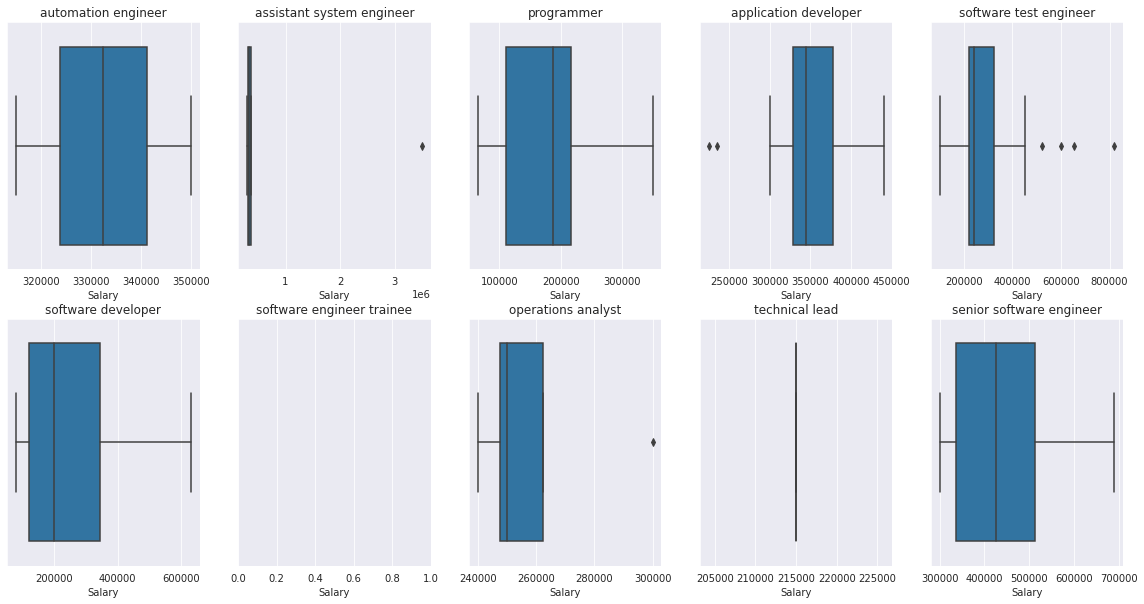

In [129]:
# for female
plt.figure(figsize=(20,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=top_designation[(top_designation["Designation"]==top_fields[j]) & (top_designation["Gender"]=="f")])
    plt.title(top_fields[j])

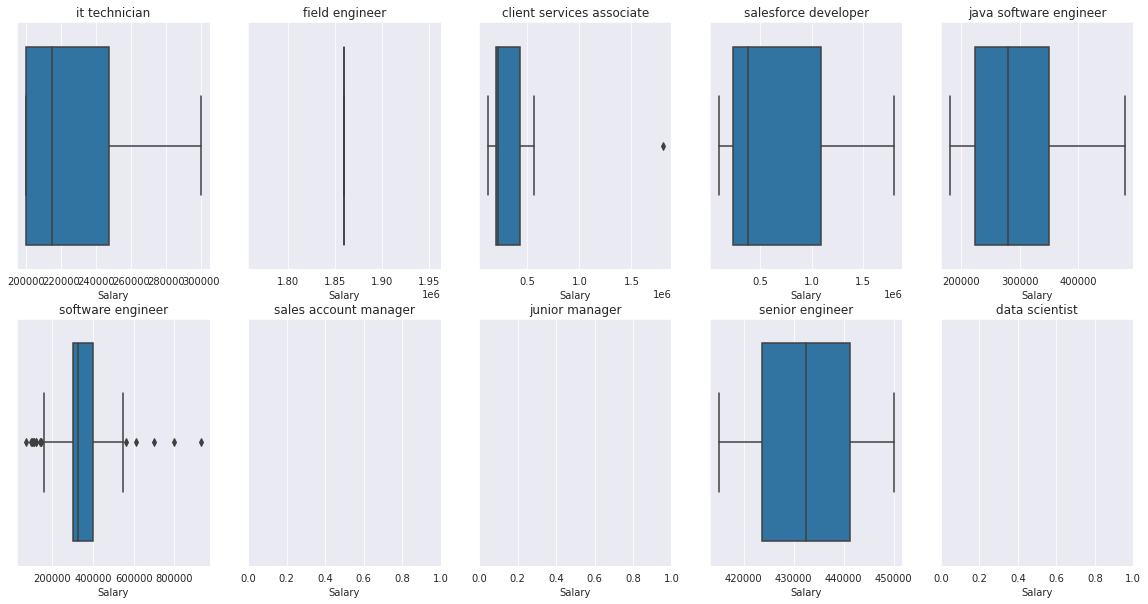

In [130]:
i=10
plt.figure(figsize=(20,10))
for j in range(len(top_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=top_designation[(top_designation["Designation"]==top_fields[i]) & (top_designation["Gender"]=="f")])
    plt.title(top_fields[i])
    i=i+1

<pre>we see that males have been working in all the sectors and females are working in less less sector but both gender are having most of salaries below 500K. But unlike males females have no record in field engg,data scientist,sales,jm</pre>

In [131]:
top_designation.head(1)

ID   Salary        DOJ                        DOL  \
3  267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   

                Designation  JobCity Gender        DOB  Class10_percentage  \
3  senior software engineer  Gurgaon      m 1989-12-05                85.6   

  10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
3    cbse             2007                83.6    cbse       6920   

   CollegeTier       Degree        Specialization  collegeGPA  CollegeCityID  \
3            1  B.Tech/B.E.  computer engineering       74.64           6920   

   CollegeCityTier CollegeState  GraduationYear  English  Logical  Quant  \
3                1        Delhi            2011      635      585    625   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
3  0.974396                  615                      0                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
3               0               0            0          0             0.0464   

   agreeableness  extraversion  nueroticism  openess_to_experience  Year  \
3         0.3448        -0.344      -0.4078                -0.9194  2022   

   Month  Day  Exp  
3      8   22   11

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 <a list of 10 Text major ticklabel objects>)

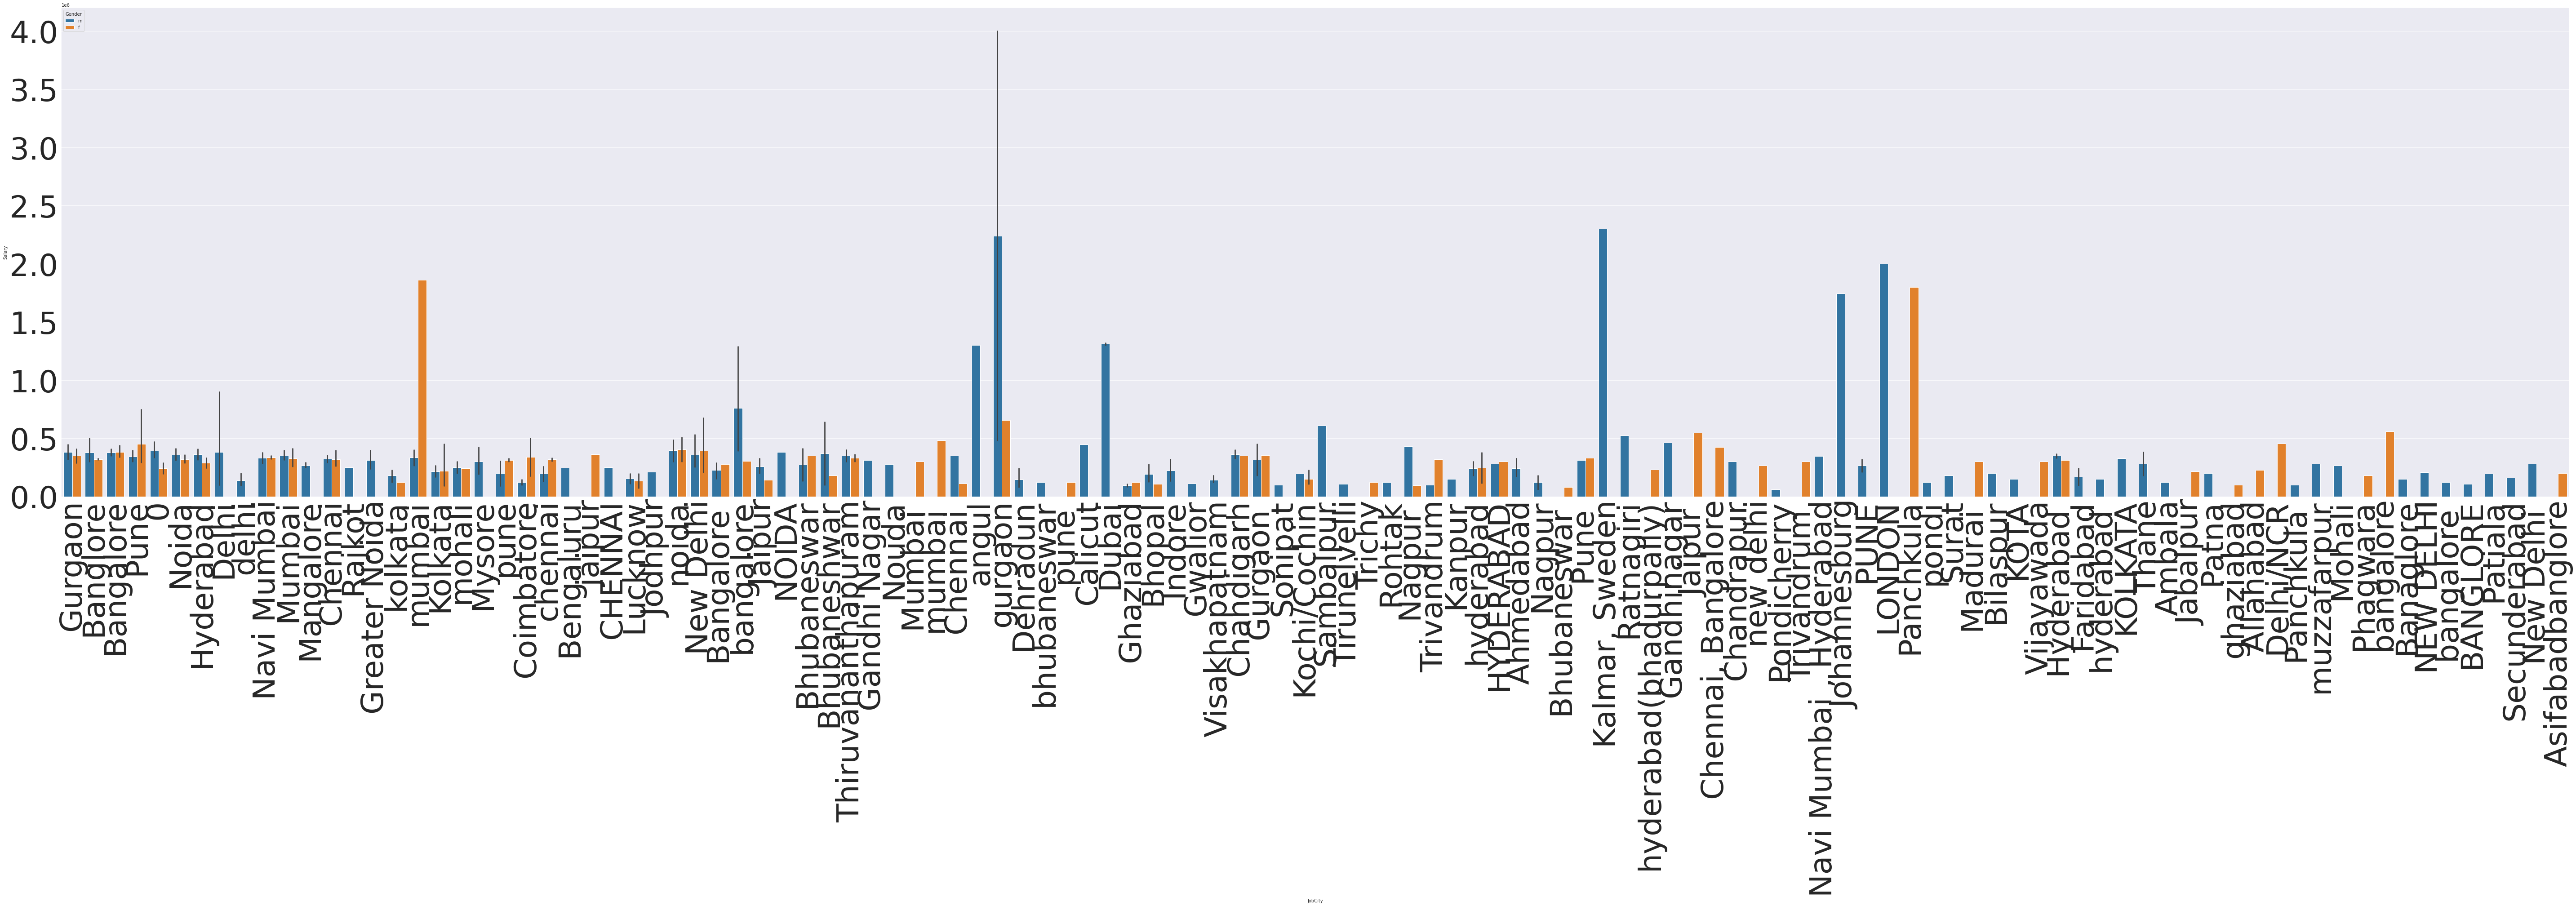

In [132]:
# Lets Look Salary By Jib City like which State offers more salary
plt.figure(figsize=(100,20))
sns.barplot(x="JobCity",y="Salary",hue="Gender",data=top_designation)
plt.xticks(fontsize=68,rotation=90)
plt.yticks(fontsize=68)

<pre>Looking aboove It Looks Like The Max salary is offered out from Gurgaon and Sweden.
</pre>

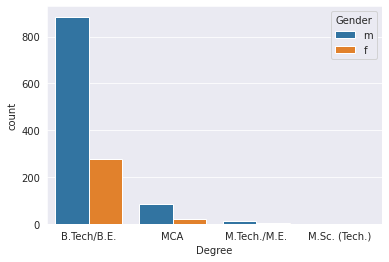

In [133]:
# Lets Check the Degree
sns.countplot(x="Degree",hue="Gender",data=top_designation)


<pre>The Degree We See that Most of The Aspirants have B.E Degree and In That Too Males have Higher Frequency.</pre>

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text major ticklabel objects>)

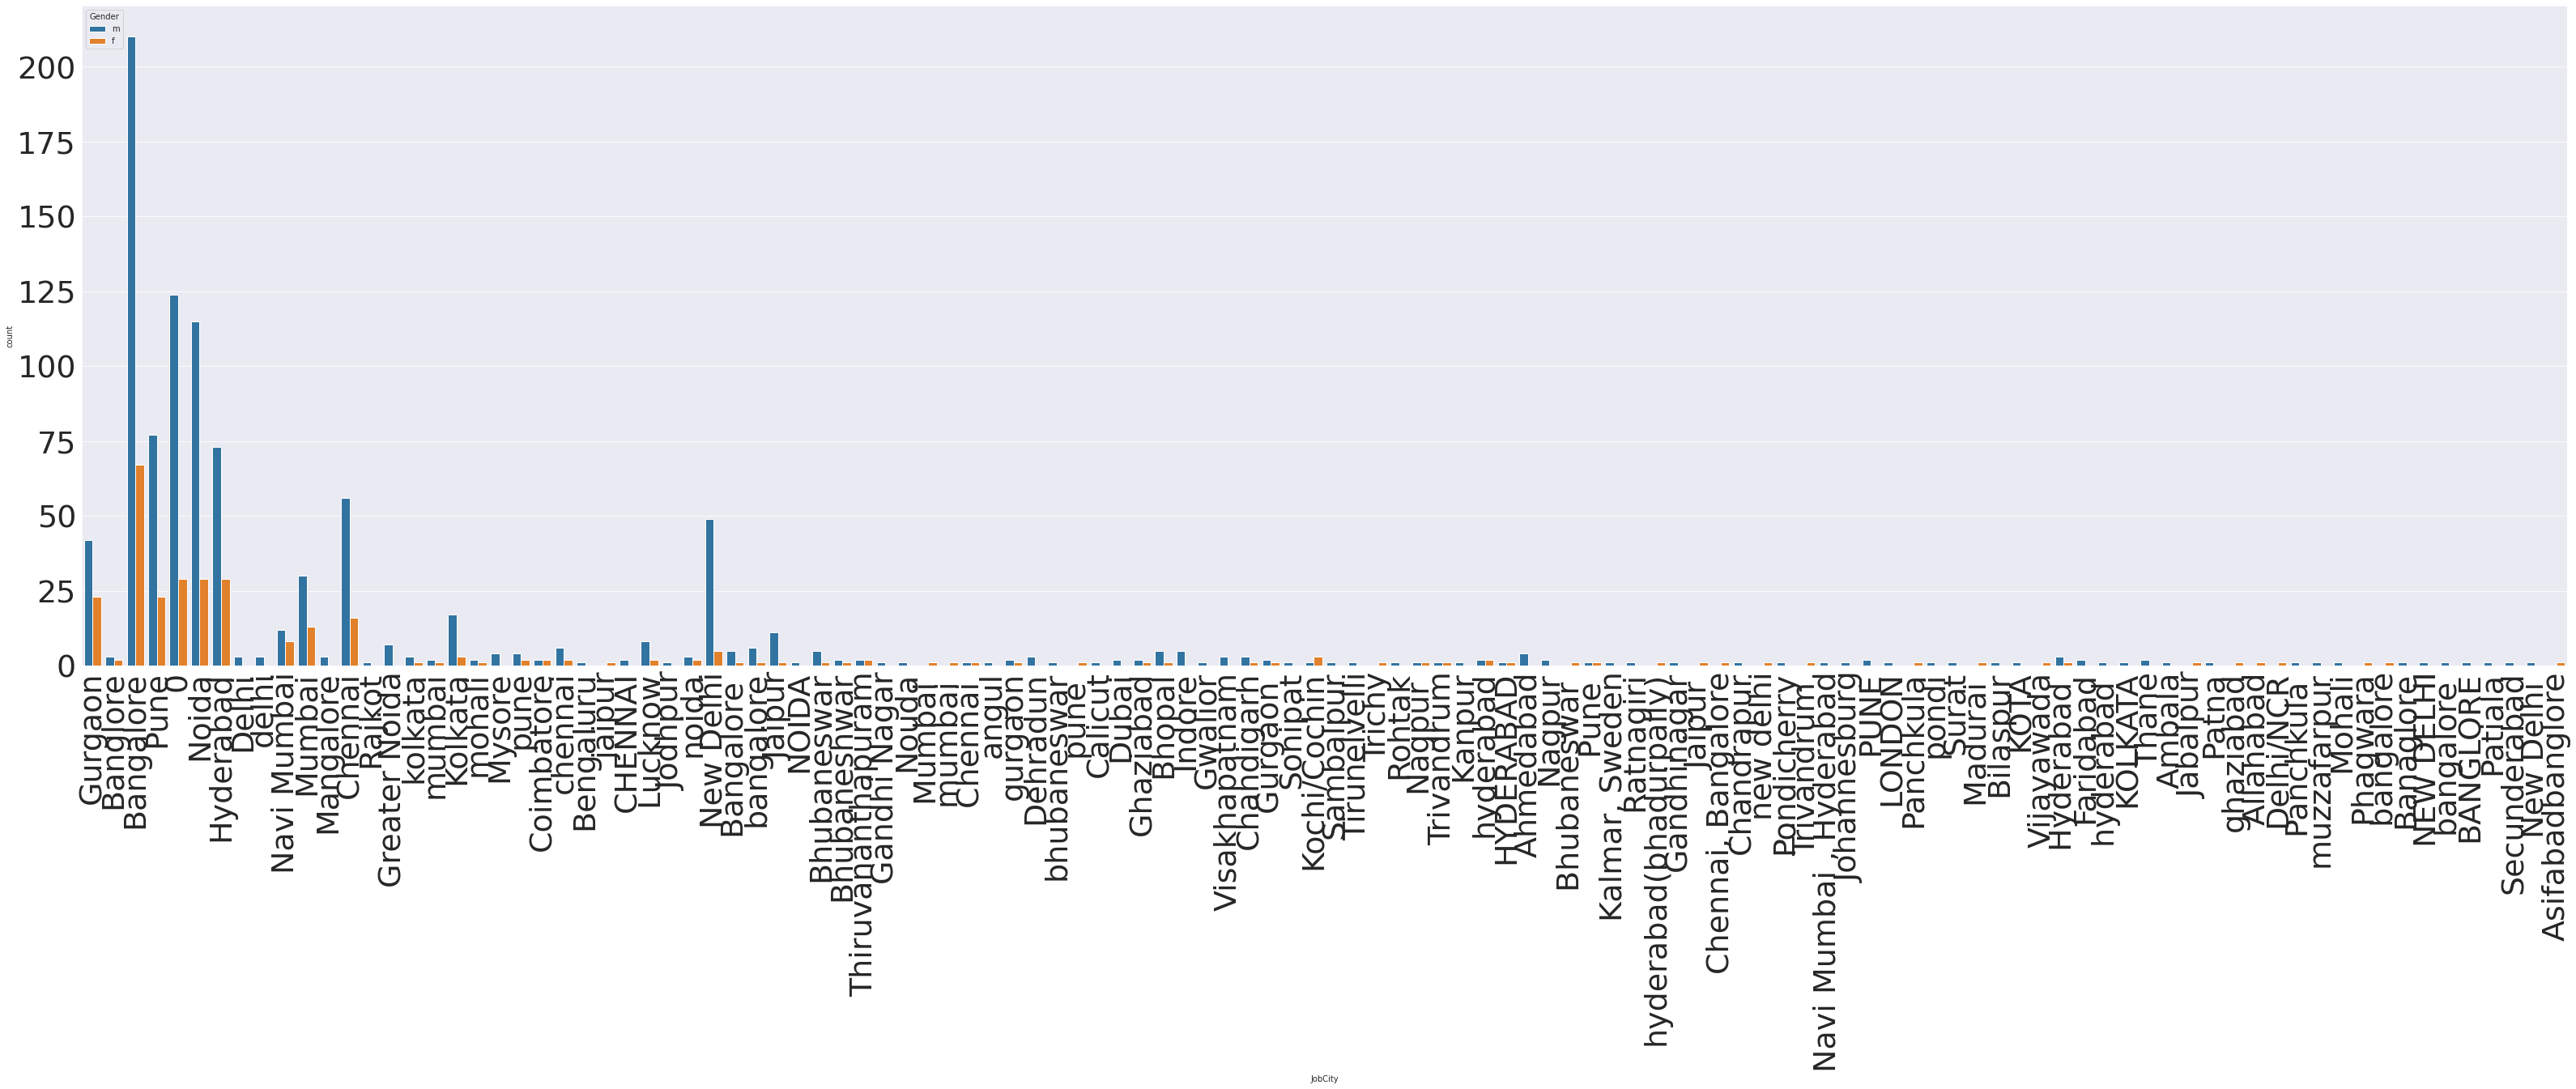

In [134]:
# Lets Check In Which State most aspirants are working.
plt.figure(figsize=(55,15))
sns.countplot(x="JobCity",data=top_designation,hue="Gender")
plt.xticks(fontsize=38,rotation=90)
plt.yticks(fontsize=38)

<pre>Most of aspirants work in Bangalore</pre>

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

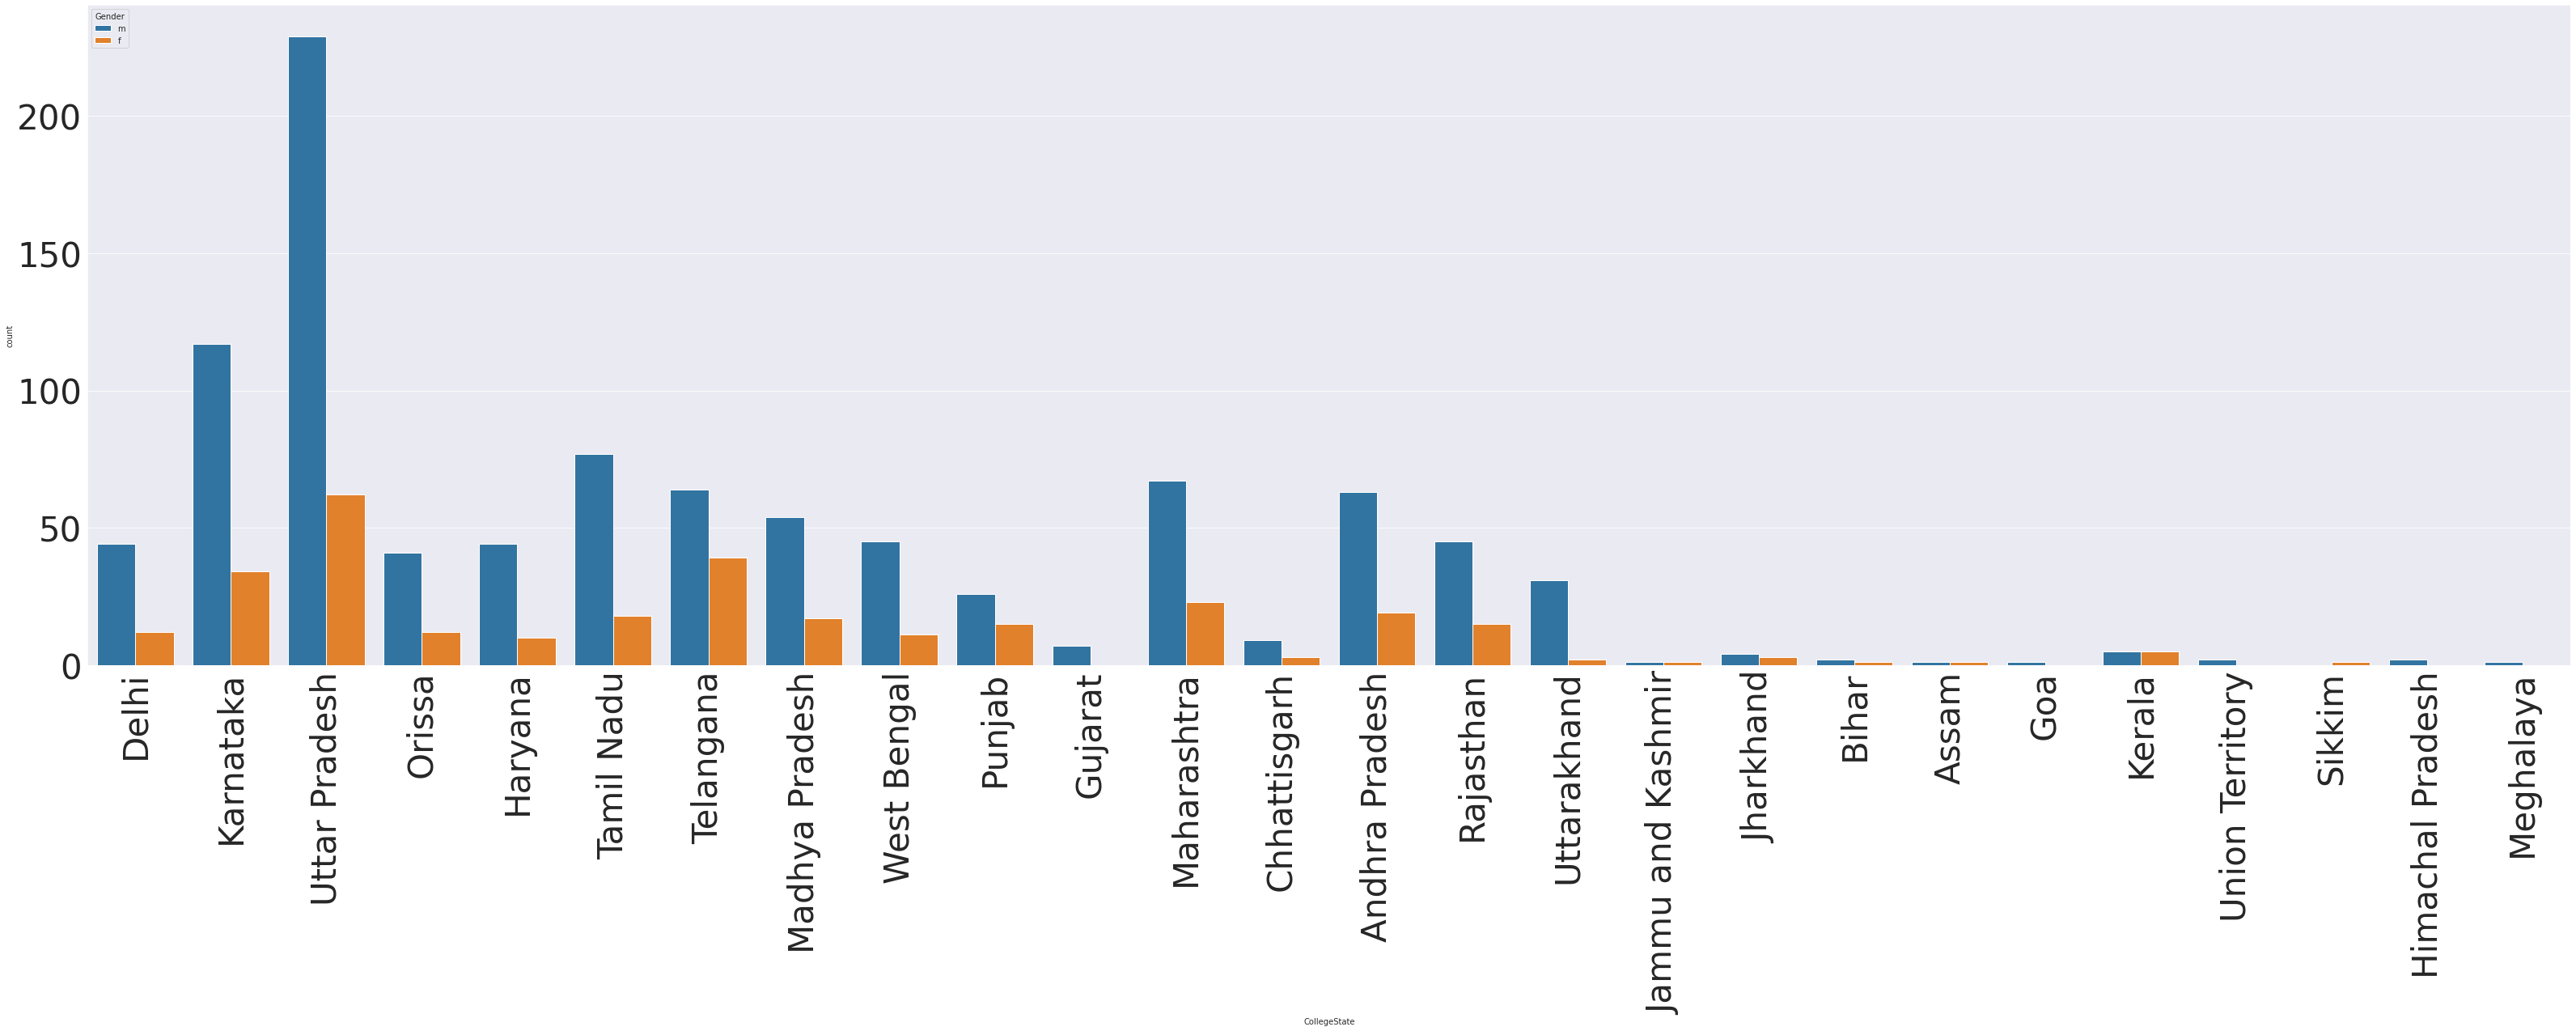

In [135]:
# Lets Check from which region most aspirants are from
plt.figure(figsize=(55,15))
sns.countplot(x="CollegeState",data=top_designation,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)

<pre>Most of aspirants are from Uttar Pradesh</pre>

In [138]:
top_designation["SAL"]=top_designation["Salary"].apply(lambda x:">=500K" if x>=5 else "<500K")
top_designation["EXPR"]=top_designation["Exp"].apply(lambda x:str(x))
top_designation["GPA"]=top_designation["collegeGPA"].apply(lambda x:str(x))
np.random.seed(1)
mindSample=top_designation[['Designation', 'JobCity', 'Gender','Degree', 'Specialization',"GPA","SAL"]].groupby("Gender").sample(200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [139]:
top_designation.head()

ID   Salary        DOJ                        DOL  \
3    267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   
6    947847   300000 2014-08-01 2015-05-01 00:00:00.000000   
14  1279958   300000 2013-07-01 2022-08-22 07:07:37.932173   
19   466888   325000 2014-09-01 2022-08-22 07:07:37.932173   
20   140069   320000 2010-11-01 2012-09-01 00:00:00.000000   

                 Designation    JobCity Gender        DOB  Class10_percentage  \
3   senior software engineer    Gurgaon      m 1989-12-05               85.60   
6     java software engineer   Banglore      m 1993-02-01               86.08   
14    java software engineer  Bangalore      m 1992-07-02               81.20   
19         software engineer       Pune      f 1990-11-30               79.00   
20         software engineer  Bangalore      f 1988-07-25               91.20   

   10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
3     cbse             2007               83.60    cbse       6920   
6    state             2010               67.50   state        314   
14   state             2008               79.90   state         64   
19    cbse             2008               62.20    cbse       7977   
20   state             2006               84.63   state       4437   

    CollegeTier       Degree                           Specialization  \
3             1  B.Tech/B.E.                     computer engineering   
6             2  B.Tech/B.E.           computer science & engineering   
14            2  B.Tech/B.E.  instrumentation and control engineering   
19            2  B.Tech/B.E.                     computer engineering   
20            2  B.Tech/B.E.                     computer engineering   

    collegeGPA  CollegeCityID  CollegeCityTier   CollegeState  GraduationYear  \
3        74.64           6920                1          Delhi            2011   
6        72.98            314                1      Karnataka            2014   
14       67.67             64                0  Uttar Pradesh            2013   
19       76.30           7977                0  Uttar Pradesh            2012   
20       78.15           4437                0      Karnataka            2010   

    English  Logical  Quant    Domain  ComputerProgramming  \
3       635      585    625  0.974396                  615   
6       590      435    380  0.356536                  405   
14      395      565    645  0.000000                  495   
19      485      445    435  0.864685                  525   
20      455      535    445  0.635979                  445   

    ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
3                       0                0               0               0   
6                       0              346               0               0   
14                      0              376               0               0   
19                      0                0               0               0   
20                      0                0               0               0   

    TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
3             0          0             0.0464         0.3448       -0.3440   
6             0          0             1.7081        -0.1054       -1.0379   
14            0          0             0.7027         0.7119        0.0100   
19            0          0             0.8192         0.2668       -0.2714   
20            0          0            -0.1082         0.9688        0.5269   

    nueroticism  openess_to_experience  Year  Month  Day  Exp     SAL    GPA  \
3       -0.4078                -0.9194  2022      8   22   11  >=500K  74.64   
6       -2.0092                -1.0872  2015      5    1    1  >=500K  72.98   
14      -0.9950                 0.6721  2022      8   22    9  >=500K  67.67   
19      -0.4078                -0.1295  2022      8   22    8  >=500K   76.3   
20      -0.2902                 0.3444  2012      9    1    2  >=500K  78.15   

   EXPR  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


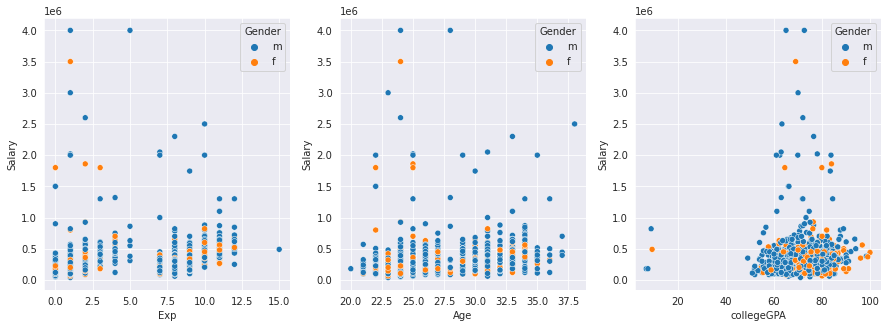

In [140]:
top_designation["Age"]=pd.to_datetime(top_designation["DOL"]).dt.year-pd.to_datetime(top_designation["DOB"]).dt.year
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x="Exp",y="Salary",data=top_designation,hue="Gender")
plt.subplot(132)
sns.scatterplot(x="Age",y="Salary",data=top_designation,hue="Gender")
plt.subplot(133)
sns.scatterplot(x="collegeGPA",y="Salary",data=top_designation,hue="Gender")

<pre>it Looks Like as the exp increases for males the salary increases so similarly as the age increases or after 25 the salary for males tend to rise and for females after 25 the salary declines.<br>
From GPA we see that most of the aspirants have GPA of 50% and mostly collegeGPA has low impact on salary. I could be like Grades dont Matter.</pre>

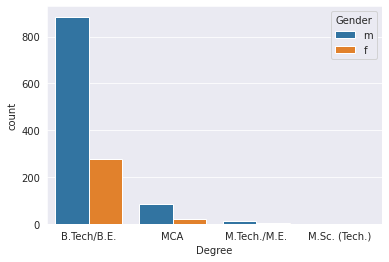

In [141]:
# Lets Check the Degree
sns.countplot(x="Degree",hue="Gender",data=top_designation)


<pre>Most of the aspirants have BE Degree and male have higher frequency</pre>

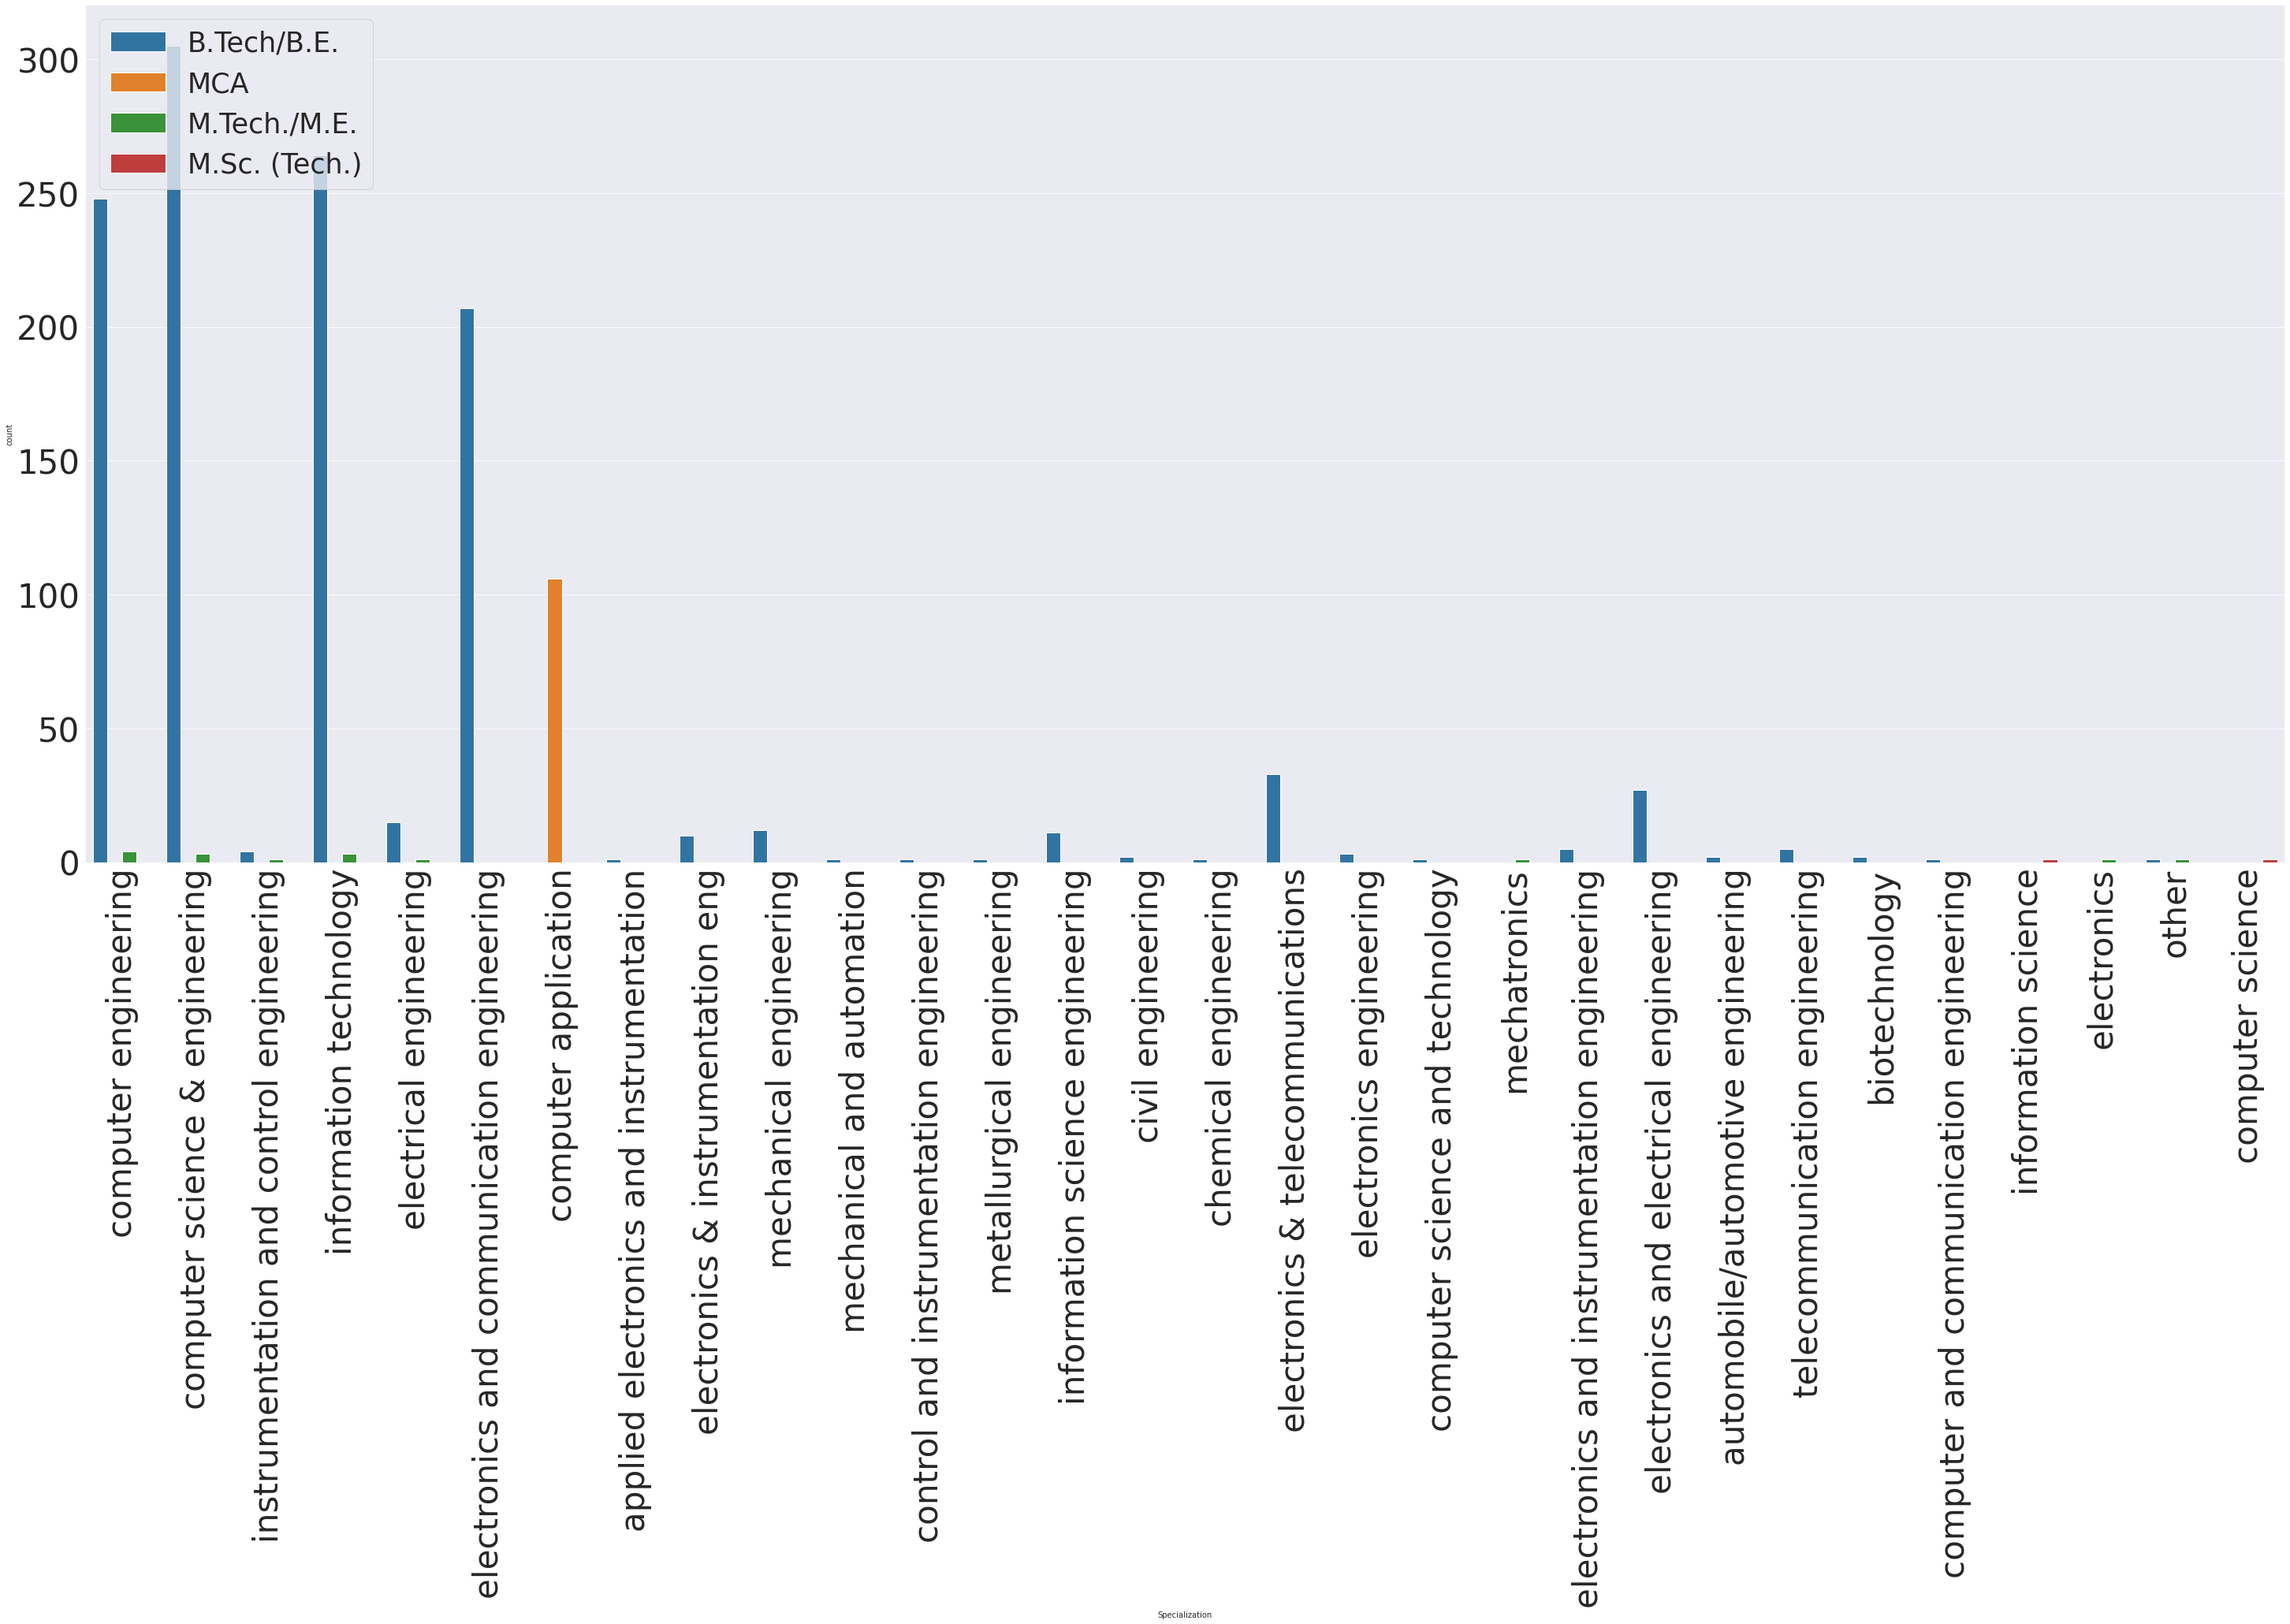

In [142]:
plt.figure(figsize=(50,20))
sns.countplot(x="Specialization",hue="Degree",data=top_designation)
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.legend(fontsize=35)

In [145]:
from scipy import stats as st

In [146]:
# Lets Test a hypothesis for sw engg field to check whether of not the salary is >=300K,Age>=27,Exp=5.
np.random.seed(1)
sw_eng_samp=top_designation[(top_designation["Designation"]=="software engineer")].sample(100)
saltest=np.round(st.ttest_1samp(sw_eng_samp["Salary"],popmean=3)[1],2)
exptest=np.round(st.ttest_1samp(sw_eng_samp["Exp"],popmean=4)[1],2)
agetest=np.round(st.ttest_1samp(sw_eng_samp["Age"],popmean=27)[1],2)
if saltest<0.05:
    print("We Reject the null claim and state that the AVG salary for Sw engineers is not 300K")
else:
    print("We accept the null claim and state that the AVG salary for Sw engineers is min 300K")
if agetest<0.05:
    print("We Reject the null claim and state that the AVG age for Sw engineers is not 27")
else:
    print("We accept the null claim and state that the AVG age for Sw engineers is 27")
if exptest<0.05:
    print("We Reject the null claim and state that the AVG exp for Sw engineers is not 4 Yrs")
else:
    print("We accept the null claim and state that the AVG exp for Sw engineers is 4 Yrs")


We Reject the null claim and state that the AVG salary for Sw engineers is not 300K
We Reject the null claim and state that the AVG age for Sw engineers is not 27
We Reject the null claim and state that the AVG exp for Sw engineers is not 4 Yrs


In [147]:
top_designation[(top_designation["Designation"]=="software engineer") & (top_designation["Gender"]=="m")][["Age","Salary","Exp"]].mean()


Age           28.208333
Salary    342843.137255
Exp            5.544118
dtype: float64

In [149]:
df.head(1)

ID  Salary        DOJ                        DOL  \
0  203097  420000 2012-06-01 2022-08-22 07:07:37.932173   

               Designation    JobCity Gender        DOB  Class10_percentage  \
0  senior quality engineer  Bangalore      f 1990-02-19                84.3   

  10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
0   state             2007                95.8   state       1141   

   CollegeTier       Degree        Specialization  collegeGPA  CollegeCityID  \
0            2  B.Tech/B.E.  computer engineering        78.0           1141   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                      0                0   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0               0               0            0          0             0.9737   

   agreeableness  extraversion  nueroticism  openess_to_experience  Year  \
0         0.8128        0.5269       1.3549                -0.4455  2022   

   Month  Day  
0      8   22

<Figure size 1440x1080 with 0 Axes>

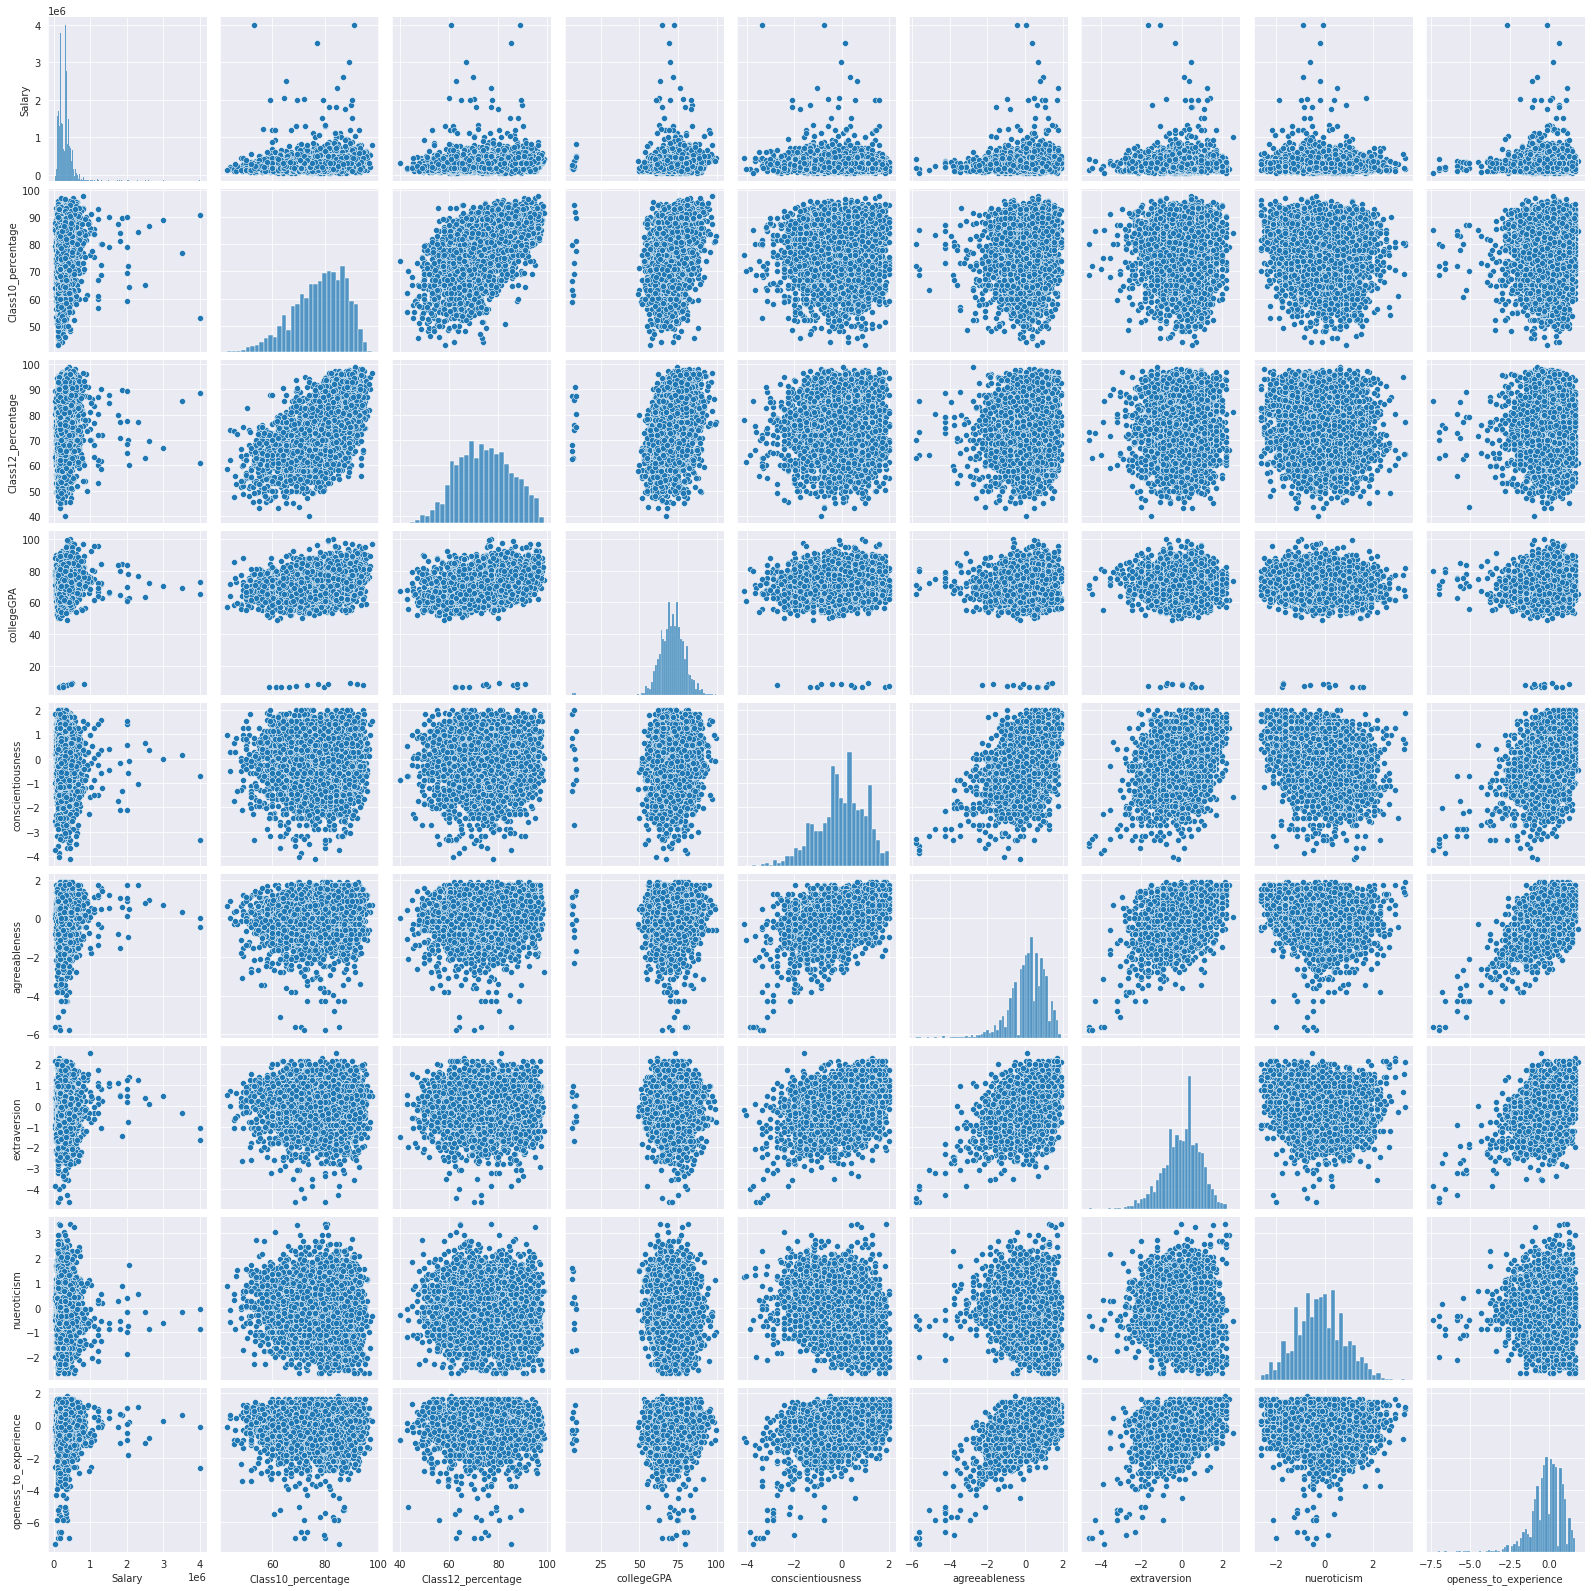

In [150]:
# Correlation between the feature using pairplot

plt.figure(figsize=(20,15))
data = df[['Salary','Class10_percentage','Class12_percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

<pre>Using Pairplot to find correlation <br>
      Not any columns effecting the Salary<br>
      </pre>

<Figure size 1440x1080 with 0 Axes>

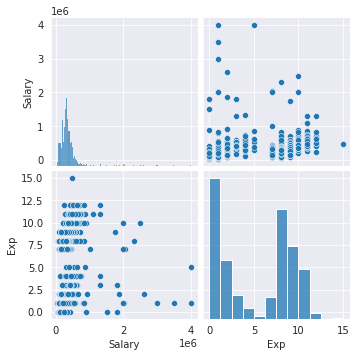

In [152]:

plt.figure(figsize=(20,15))
data = top_designation[['Salary','Exp']]
sns.pairplot(data)
plt.show()

<pre>Little bit of changes in Salary columns when we find the corelation between exp and salary</pre>

> # Research Questions: 
  Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.

In [154]:
# hypothesis testing

df.head()

ID   Salary        DOJ                        DOL  \
0  203097   420000 2012-06-01 2022-08-22 07:07:37.932173   
1  579905   500000 2013-09-01 2022-08-22 07:07:37.932173   
2  810601   325000 2014-06-01 2022-08-22 07:07:37.932173   
3  267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   
4  343523   200000 2014-03-01 2015-03-01 00:00:00.000000   

                Designation    JobCity Gender        DOB  Class10_percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19                84.3   
1         assistant manager     Indore      m 1989-10-04                85.4   
2          systems engineer    Chennai      f 1992-08-03                85.0   
3  senior software engineer    Gurgaon      m 1989-12-05                85.6   
4                       get    Manesar      m 1991-02-27                78.0   

  10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
0   state             2007                95.8   state       1141   
1    cbse             2007                85.0    cbse       5807   
2    cbse             2010                68.2    cbse         64   
3    cbse             2007                83.6    cbse       6920   
4    cbse             2008                76.8    cbse      11368   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  \
0       78.00           1141                0  Andhra Pradesh            2011   
1       70.06           5807                0  Madhya Pradesh            2012   
2       70.00             64                0   Uttar Pradesh            2014   
3       74.64           6920                1           Delhi            2011   
4       73.90          11368                0   Uttar Pradesh            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      515      585    525  0.635979                  445   
1      695      610    780  0.960603                    0   
2      615      545    370  0.450877                  395   
3      635      585    625  0.974396                  615   
4      545      625    465  0.124502                    0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                      0                0               0               0   
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0            0          0             0.9737         0.8128        0.5269   
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  Year  Month  Day  
0      1.35490                -0.4455  2022      8   22  
1     -0.10760                 0.8637  2022      8   22  
2     -0.86820                 0.6721  2022      8   22  
3     -0.40780                -0.9194  2022      8   22  
4      0.09163                -0.1295  2015      3    1

In [155]:
# Normalize Salary for Better Visualization

df['nor_sal']=df['Salary']/100000

In [159]:
print('Average Salary :')
print('Programmer Analyst :',round(df['nor_sal'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['nor_sal'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['nor_sal'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['nor_sal'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))


Average Salary :
Programmer Analyst : 3.02
Software Engineer : 3.4
Hardware Engineer : nan
Associate Engineer : 3.32


In [160]:
# Sample Data of required employees

sample = np.array([3.02,3.4,0,3.32])
sample

array([3.02, 3.4 , 0.  , 3.32])

In [161]:
# mean
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.435

In [162]:
# Standard Deviation
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.6315534519796362


In [163]:
pop_mean = 2.75
sample_mean = 2.43
sample_std = 1.63
sample_size = 4

In [164]:
# Calling T-score Function
def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator


t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : -0.3926380368098158


In [165]:
# Two Tail - Deciding the Significance Level & Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


t_critical_left : 0.1563062611933259
t_critical_right : 5.3436937388066745


Text(2.43, 0.1, 'x_bar')

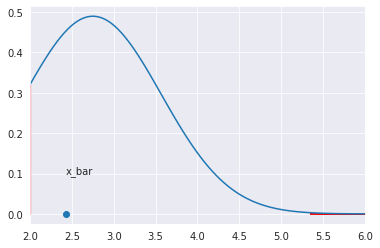

In [166]:
# Visualizing the Sampling Distribution with Rejection Regions
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [167]:
# Compairing the Table Value and T-score value
# Conclusion using t-test
if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [168]:
# Conclusion using p-test
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.6945868418432073
Fail to reject Null Hypothesis


> # Feature Tranformation

Column Standardization for Numerical Features:


In [169]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [171]:
# Standardizing Salary Column

scaled_sal = scaler.fit_transform(df['Salary'].values.reshape(-1,1))
print(scaled_sal[:20])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]
 [0.14249685]
 [0.10466583]
 [0.0592686 ]
 [0.04161412]
 [0.0668348 ]
 [0.07944515]
 [0.07313997]
 [0.05422446]
 [0.02143758]
 [0.07313997]]


In [176]:
# Standardizing 10th percent Column
scaled_10 = scaler.fit_transform(df['Class10_percentage'].values.reshape(-1,1))
print(scaled_10[:20])

[[0.75420015]
 [0.7742878 ]
 [0.7669832 ]
 [0.7779401 ]
 [0.63915267]
 [0.8568298 ]
 [0.78670562]
 [0.89481373]
 [0.85829072]
 [0.62089116]
 [0.83272462]
 [0.69393718]
 [0.74141709]
 [0.32505478]
 [0.69758948]
 [0.48466034]
 [0.7815924 ]
 [0.32505478]
 [0.4017531 ]
 [0.65741417]]


In [177]:
# Standardizing 12th percent Column
scaled_12 = scaler.fit_transform(df['Class12_percentage'].values.reshape(-1,1))
print(scaled_12[:20])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]
 [0.74446337]
 [0.78364566]
 [0.50817717]
 [0.38160136]
 [0.67972743]
 [0.41618399]
 [0.59284497]
 [0.45417376]
 [0.42248722]
 [0.37819421]]


> # Column Standardization for Categorical Features:


In [178]:
# One-hot Encoding of Gender column
dummies = pd.get_dummies(df[['Gender']])
dummies

Gender_f  Gender_m
0            1         0
1            0         1
2            1         0
3            0         1
4            0         1
...        ...       ...
3993         0         1
3994         1         0
3995         0         1
3996         1         0
3997         1         0

[3998 rows x 2 columns]

In [179]:
df1 = pd.concat([df,dummies],axis='columns')
df1.head()

ID   Salary        DOJ                        DOL  \
0  203097   420000 2012-06-01 2022-08-22 07:07:37.932173   
1  579905   500000 2013-09-01 2022-08-22 07:07:37.932173   
2  810601   325000 2014-06-01 2022-08-22 07:07:37.932173   
3  267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   
4  343523   200000 2014-03-01 2015-03-01 00:00:00.000000   

                Designation    JobCity Gender        DOB  Class10_percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19                84.3   
1         assistant manager     Indore      m 1989-10-04                85.4   
2          systems engineer    Chennai      f 1992-08-03                85.0   
3  senior software engineer    Gurgaon      m 1989-12-05                85.6   
4                       get    Manesar      m 1991-02-27                78.0   

  10board  Class12_Passout  Class12_percentage 12board  CollegeID  \
0   state             2007                95.8   state       1141   
1    cbse             2007                85.0    cbse       5807   
2    cbse             2010                68.2    cbse         64   
3    cbse             2007                83.6    cbse       6920   
4    cbse             2008                76.8    cbse      11368   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  \
0       78.00           1141                0  Andhra Pradesh            2011   
1       70.06           5807                0  Madhya Pradesh            2012   
2       70.00             64                0   Uttar Pradesh            2014   
3       74.64           6920                1           Delhi            2011   
4       73.90          11368                0   Uttar Pradesh            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      515      585    525  0.635979                  445   
1      695      610    780  0.960603                    0   
2      615      545    370  0.450877                  395   
3      635      585    625  0.974396                  615   
4      545      625    465  0.124502                    0   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                      0                0               0               0   
1                    466                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                    233                0               0               0   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0            0          0             0.9737         0.8128        0.5269   
1            0          0            -0.7335         0.3789        1.2396   
2            0          0             0.2718         1.7109        0.1637   
3            0          0             0.0464         0.3448       -0.3440   
4            0          0            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  Year  Month  Day  nor_sal  Gender_f  \
0      1.35490                -0.4455  2022      8   22     4.20         1   
1     -0.10760                 0.8637  2022      8   22     5.00         0   
2     -0.86820                 0.6721  2022      8   22     3.25         1   
3     -0.40780                -0.9194  2022      8   22    11.00         0   
4      0.09163                -0.1295  2015      3    1     2.00         0   

   Gender_m  
0         0  
1         1  
2         0  


In [180]:
finaldf = df1.drop(['Gender','Gender_f'],axis='columns')
finaldf

ID   Salary        DOJ                        DOL  \
0     203097   420000 2012-06-01 2022-08-22 07:07:37.932173   
1     579905   500000 2013-09-01 2022-08-22 07:07:37.932173   
2     810601   325000 2014-06-01 2022-08-22 07:07:37.932173   
3     267447  1100000 2011-07-01 2022-08-22 07:07:37.932173   
4     343523   200000 2014-03-01 2015-03-01 00:00:00.000000   
...      ...      ...        ...                        ...   
3993   47916   280000 2011-10-01 2012-10-01 00:00:00.000000   
3994  752781   100000 2013-07-01 2013-07-01 00:00:00.000000   
3995  355888   320000 2013-07-01 2022-08-22 07:07:37.932173   
3996  947111   200000 2014-07-01 2015-01-01 00:00:00.000000   
3997  324966   400000 2013-02-01 2022-08-22 07:07:37.932173   

                      Designation           JobCity        DOB  \
0         senior quality engineer         Bangalore 1990-02-19   
1               assistant manager            Indore 1989-10-04   
2                systems engineer           Chennai 1992-08-03   
3        senior software engineer           Gurgaon 1989-12-05   
4                             get           Manesar 1991-02-27   
...                           ...               ...        ...   
3993            software engineer        New Delhi  1987-04-15   
3994             technical writer         Hyderabad 1992-08-27   
3995  associate software engineer         Bangalore 1991-07-03   
3996           software developer  Asifabadbanglore 1992-03-20   
3997      senior systems engineer           Chennai 1991-02-26   

      Class10_percentage 10board  Class12_Passout  Class12_percentage 12board  \
0                  84.30   state             2007               95.80   state   
1                  85.40    cbse             2007               85.00    cbse   
2                  85.00    cbse             2010               68.20    cbse   
3                  85.60    cbse             2007               83.60    cbse   
4                  78.00    cbse             2008               76.80    cbse   
...                  ...     ...              ...                 ...     ...   
3993               52.09    cbse             2006               55.50    cbse   
3994               90.00   state             2009               93.00   state   
3995               81.86   state             2008               65.50   state   
3996               78.72   state             2010               69.88   state   
3997               70.60    cbse             2008               68.00    cbse   

      CollegeID  CollegeTier       Degree  \
0          1141            2  B.Tech/B.E.   
1          5807            2  B.Tech/B.E.   
2            64            2  B.Tech/B.E.   
3          6920            1  B.Tech/B.E.   
4         11368            2  B.Tech/B.E.   
...         ...          ...          ...   
3993       6268            2  B.Tech/B.E.   
3994       4883            2  B.Tech/B.E.   
3995       9786            2  B.Tech/B.E.   
3996        979            2  B.Tech/B.E.   
3997       6609            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  CollegeCityID  \
0                          computer engineering       78.00           1141   
1     electronics and communication engineering       70.06           5807   
2                        information technology       70.00             64   
3                          computer engineering       74.64           6920   
4     electronics and communication engineering       73.90          11368   
...                                         ...         ...            ...   
3993                     information technology       61.50           6268   
3994  electronics and communication engineering       77.30           4883   
3995                       computer engineering       70.00           9786   
3996             computer science & engineering       70.42            979   
3997                     information technology       68.00           6609   

      Col